In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### *Importing the Dataset*

In [207]:
data = pd.read_csv('dataset.csv',low_memory=False)
data.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [208]:
data.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

##### *There a total of 958524 rows and 45 features or columns*

In [210]:
data.shape

(958524, 45)

In [211]:
data.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,...,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,...,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,...,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,...,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,...,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,...,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,...,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


#### *Checking whether the data has Null values*

In [212]:
data.isnull().sum()

id                     0
spkid                  0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926


#### *All datatypes In Our Dataset*

In [213]:
data.dtypes

id                 object
spkid               int64
full_name          object
pdes               object
name               object
prefix             object
neo                object
pha                object
H                 float64
diameter          float64
albedo            float64
diameter_sigma    float64
orbit_id           object
epoch             float64
epoch_mjd           int64
epoch_cal         float64
equinox            object
e                 float64
a                 float64
q                 float64
i                 float64
om                float64
w                 float64
ma                float64
ad                float64
n                 float64
tp                float64
tp_cal            float64
per               float64
per_y             float64
moid              float64
moid_ld           float64
sigma_e           float64
sigma_a           float64
sigma_q           float64
sigma_i           float64
sigma_om          float64
sigma_w           float64
sigma_ma    

In [214]:
data.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

#### *Renaming some columns for our understanding*

In [215]:
data = data.rename(columns = {'pdes':'PDES','id':'ID','e':'Eccentricity','a':'Semi_Major_Axis','q':'Perihelion_Distance','i':'Inclination','M':'Mean_Anomaly','tp': 'Time_of_Perihelion_Passage','n':'Mean_Motion','Q':'Aphelion_Distance','full_name':'Full_Name','spkid':'SPKID','class':'Classification','albedo':'Albedo','per':'Period_Days','per_y':'Period_Years'}).copy()
data.head()

,ID,SPKID,Full_Name,PDES,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,Classification,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [216]:
data.columns

Index(['ID', 'SPKID', 'Full_Name', 'PDES', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'Albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'Eccentricity', 'Semi_Major_Axis',
       'Perihelion_Distance', 'Inclination', 'om', 'w', 'ma', 'ad',
       'Mean_Motion', 'Time_of_Perihelion_Passage', 'tp_cal', 'Period_Days',
       'Period_Years', 'moid', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q',
       'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n',
       'sigma_tp', 'sigma_per', 'Classification', 'rms'],
      dtype='object')

#### *pha = Potential Hazardous Asteroid*


#### *Here we are checking the number of potential hazardous asteroids in our  the dataset*

In [217]:
data['pha'].value_counts()

N    936537
Y      2066
Name: pha, dtype: int64

<AxesSubplot:ylabel='pha'>

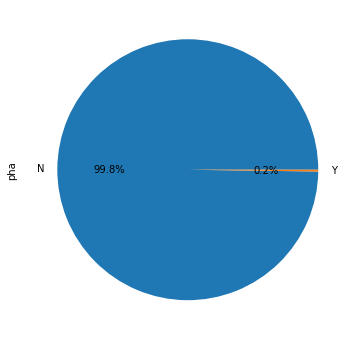

In [218]:
data['pha'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))

#### *Here in The above PieGraph we can see almost 99.8 percent Asteroids are Non-Hazardous  and only 0.2 percent are Hazardous*

#### *neo refers to Near Earth Object*

In [219]:
data['neo'].value_counts()

N    935625
Y     22895
Name: neo, dtype: int64

<AxesSubplot:ylabel='neo'>

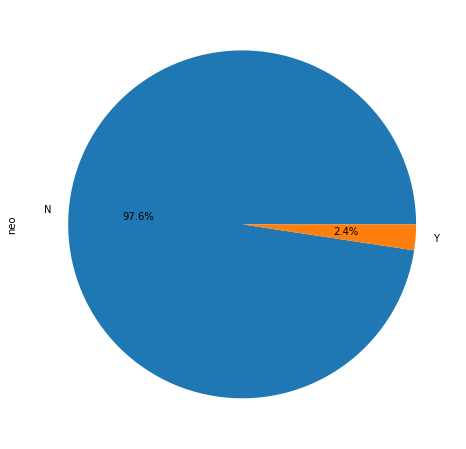

In [220]:
data['neo'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))

#### *We can see here In this dataset we have approx 2.4 percent near earth objects*

#### *Dropping all the columns that are not required for the analysis*

In [221]:
data.columns

Index(['ID', 'SPKID', 'Full_Name', 'PDES', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'Albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'Eccentricity', 'Semi_Major_Axis',
       'Perihelion_Distance', 'Inclination', 'om', 'w', 'ma', 'ad',
       'Mean_Motion', 'Time_of_Perihelion_Passage', 'tp_cal', 'Period_Days',
       'Period_Years', 'moid', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q',
       'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n',
       'sigma_tp', 'sigma_per', 'Classification', 'rms'],
      dtype='object')

#### *These columns will not contribute for our analysis so we will drop them*


In [222]:
data1=data.drop(['ID', 'PDES', 'name', 'prefix', 'equinox','Full_Name',
                 'SPKID'], axis='columns', inplace=False)

In [223]:
data1.reset_index(drop=True, inplace=True)
data1.head()

,neo,pha,H,diameter,Albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,Classification,rms
0,N,N,3.40,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,N,N,4.20,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,N,N,5.33,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,N,N,3.00,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,N,N,6.90,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


## *Data Preprocessing*

#### *Finding the number of null values in each column*

In [224]:
data1.isnull().sum()

neo                                4
pha                            19921
H                               6263
diameter                      822315
Albedo                        823421
diameter_sigma                822443
orbit_id                           0
epoch                              0
epoch_mjd                          0
epoch_cal                          0
Eccentricity                       0
Semi_Major_Axis                    0
Perihelion_Distance                0
Inclination                        0
om                                 0
w                                  0
ma                                 1
ad                                 4
Mean_Motion                        0
Time_of_Perihelion_Passage         0
tp_cal                             0
Period_Days                        4
Period_Years                       1
moid                           19921
moid_ld                          127
sigma_e                        19922
sigma_a                        19922
s

#### *As we can see, there are a lot of null values in some of the features in the  data, so we need to drop them*

In [225]:
data1=data1.drop(['diameter','Albedo','diameter_sigma'],axis='columns', inplace=False)
data1.head()

,neo,pha,H,orbit_id,epoch,epoch_mjd,epoch_cal,Eccentricity,Semi_Major_Axis,Perihelion_Distance,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,Classification,rms
0,N,N,3.40,JPL 47,2458600.5,58600,20190427.0,0.076009,2.769165,2.558684,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,N,N,4.20,JPL 37,2459000.5,59000,20200531.0,0.229972,2.773841,2.135935,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,N,N,5.33,JPL 112,2459000.5,59000,20200531.0,0.256936,2.668285,1.982706,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,N,N,3.00,JPL 35,2458600.5,58600,20190427.0,0.088721,2.361418,2.151909,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,N,N,6.90,JPL 114,2459000.5,59000,20200531.0,0.190913,2.574037,2.082619,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [226]:
data1.isnull().sum()

neo                               4
pha                           19921
H                              6263
orbit_id                          0
epoch                             0
epoch_mjd                         0
epoch_cal                         0
Eccentricity                      0
Semi_Major_Axis                   0
Perihelion_Distance               0
Inclination                       0
om                                0
w                                 0
ma                                1
ad                                4
Mean_Motion                       0
Time_of_Perihelion_Passage        0
tp_cal                            0
Period_Days                       4
Period_Years                      1
moid                          19921
moid_ld                         127
sigma_e                       19922
sigma_a                       19922
sigma_q                       19922
sigma_i                       19922
sigma_om                      19922
sigma_w                     

In [227]:
data1.columns

Index(['neo', 'pha', 'H', 'orbit_id', 'epoch', 'epoch_mjd', 'epoch_cal',
       'Eccentricity', 'Semi_Major_Axis', 'Perihelion_Distance', 'Inclination',
       'om', 'w', 'ma', 'ad', 'Mean_Motion', 'Time_of_Perihelion_Passage',
       'tp_cal', 'Period_Days', 'Period_Years', 'moid', 'moid_ld', 'sigma_e',
       'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma',
       'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'Classification',
       'rms'],
      dtype='object')

*As we saw there are many columns with null values, we will drop all the columns with more than 50% null values
we are planning to  null values with mean or median values for others.
 we will drop the rows with null values in the remaining columns*

In [228]:
data1.shape

(958524, 35)

In [230]:
#replace null values of h with mode 
print("The mean of H is: ", data1['H'].mean())

print("The mode of H is: ", data1['H'].mode()[0])

data1['H'].fillna(data1['H'].mean(), inplace=True)



The mean of H is:  16.906411227699124
The mode of H is:  16.8


In [231]:
# #replace null values of moid with mode
# print("The mode of neo is: ", data1['neo'].mode()[0])

# data1['neo'].fillna(data1['neo'].mode()[0], inplace=True)

In [232]:
print("The mean of rms is: ", data1['rms'].mean())
print("The mode of rms is: ", data1['rms'].mode()[0])

data1['rms'].fillna(data1['rms'].mean(), inplace=True)

The mean of rms is:  0.5611528091332864
The mode of rms is:  0.25


In [233]:
print(data1['H'].isnull().sum())

0


In [234]:
data1.isnull().sum()

neo                               4
pha                           19921
H                                 0
orbit_id                          0
epoch                             0
epoch_mjd                         0
epoch_cal                         0
Eccentricity                      0
Semi_Major_Axis                   0
Perihelion_Distance               0
Inclination                       0
om                                0
w                                 0
ma                                1
ad                                4
Mean_Motion                       0
Time_of_Perihelion_Passage        0
tp_cal                            0
Period_Days                       4
Period_Years                      1
moid                          19921
moid_ld                         127
sigma_e                       19922
sigma_a                       19922
sigma_q                       19922
sigma_i                       19922
sigma_om                      19922
sigma_w                     

c:\Users\vardh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='moid_ld', ylabel='Density'>

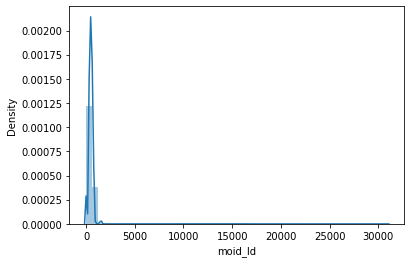

In [235]:
import seaborn as sns
sns.distplot(data1['moid_ld'])

#### *We can see the data is more concentrated in 0 to 1000 so we can replace the null values with mean values*

In [236]:
data1['moid_ld'].describe()

count    958397.000000
mean        539.364207
std         834.306975
min           0.000000
25%         375.394939
50%         477.706175
75%         617.324804
max       30929.908422
Name: moid_ld, dtype: float64

In [237]:
data1['moid_ld'].fillna(data1['moid_ld'].mean(), inplace=True)

In [238]:
data1['ma'].fillna(data1['ma'].mean(), inplace=True)
data1['Period_Days'].fillna(data1['Period_Days'].mean(), inplace=True)
data1['Period_Years'].fillna(data1['Period_Years'].mean(), inplace=True)

In [239]:
# data1.dropna(inplace=True)
data1.isnull().sum()

neo                               4
pha                           19921
H                                 0
orbit_id                          0
epoch                             0
epoch_mjd                         0
epoch_cal                         0
Eccentricity                      0
Semi_Major_Axis                   0
Perihelion_Distance               0
Inclination                       0
om                                0
w                                 0
ma                                0
ad                                4
Mean_Motion                       0
Time_of_Perihelion_Passage        0
tp_cal                            0
Period_Days                       0
Period_Years                      0
moid                          19921
moid_ld                           0
sigma_e                       19922
sigma_a                       19922
sigma_q                       19922
sigma_i                       19922
sigma_om                      19922
sigma_w                     

In [240]:
# we are dropping the rows of the reamaning features if they have null values to have better accuracy
data1.dropna(inplace=True)

In [241]:
data1.reset_index(drop=True, inplace=True)

In [242]:
data1.isnull().sum()

neo                           0
pha                           0
H                             0
orbit_id                      0
epoch                         0
epoch_mjd                     0
epoch_cal                     0
Eccentricity                  0
Semi_Major_Axis               0
Perihelion_Distance           0
Inclination                   0
om                            0
w                             0
ma                            0
ad                            0
Mean_Motion                   0
Time_of_Perihelion_Passage    0
tp_cal                        0
Period_Days                   0
Period_Years                  0
moid                          0
moid_ld                       0
sigma_e                       0
sigma_a                       0
sigma_q                       0
sigma_i                       0
sigma_om                      0
sigma_w                       0
sigma_ma                      0
sigma_ad                      0
sigma_n                       0
sigma_tp

In [243]:
data1.shape

(938598, 35)

In [244]:
print("The number of rows which are  dropped is: ")
print(abs(data.shape[0]-data1.shape[0]))
print("The number of columns which  are dropped is: ")
print(abs(data.shape[1]-data1.shape[1]))

The number of rows which are  dropped is: 
19926
The number of columns which  are dropped is: 
10


In [245]:
data1['Classification'].value_counts()

MBA    837430
OMB     27815
IMB     19903
MCA     18356
APO     12687
AMO      8456
TJN      8160
TNO      3461
ATE      1729
CEN       504
AST        75
IEO        22
Name: Classification, dtype: int64

In [246]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938598 entries, 0 to 938597
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   neo                         938598 non-null  object 
 1   pha                         938598 non-null  object 
 2   H                           938598 non-null  float64
 3   orbit_id                    938598 non-null  object 
 4   epoch                       938598 non-null  float64
 5   epoch_mjd                   938598 non-null  int64  
 6   epoch_cal                   938598 non-null  float64
 7   Eccentricity                938598 non-null  float64
 8   Semi_Major_Axis             938598 non-null  float64
 9   Perihelion_Distance         938598 non-null  float64
 10  Inclination                 938598 non-null  float64
 11  om                          938598 non-null  float64
 12  w                           938598 non-null  float64
 13  ma            

<AxesSubplot:ylabel='Classification'>

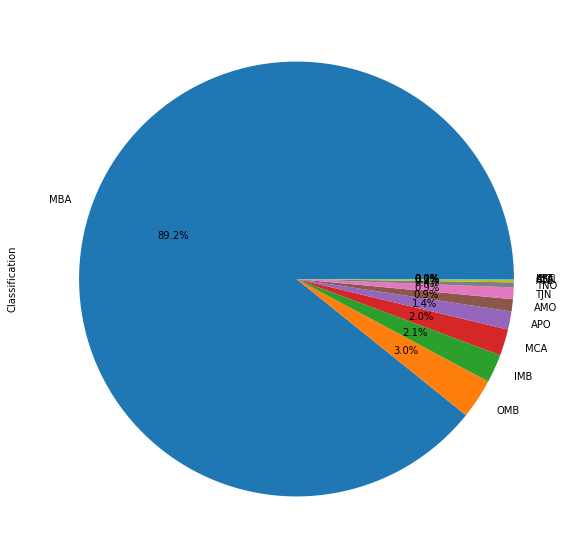

In [247]:
data1['Classification'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,10))

In [248]:
data1[data1['Classification']=='MBA']['pha'].value_counts()

N    837430
Name: pha, dtype: int64

In [249]:
data1['pha'].value_counts()

N    936532
Y      2066
Name: pha, dtype: int64

<AxesSubplot:ylabel='pha'>

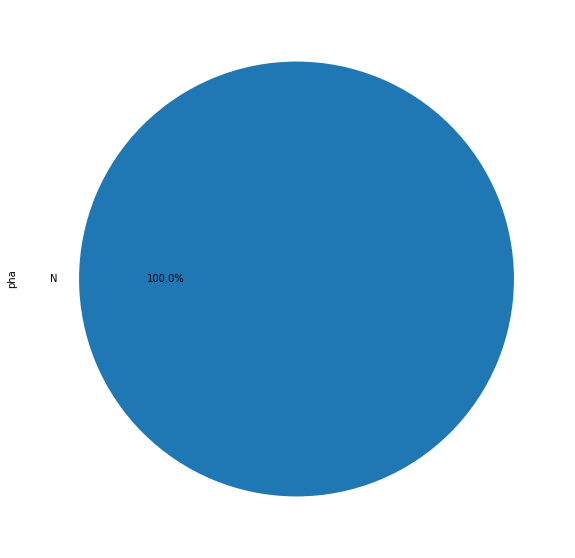

In [250]:
data1[data1['Classification']=='MBA']['pha'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,10))

### *We have understood that for class MBA all asteriods are classifed as non hazardous so we will drop the class_mba column*

In [251]:
# drop the rows whose classification is MBA

data1.drop(data1[data1['Classification']=='MBA'].index, inplace=True)

data1.reset_index(drop=True, inplace=True)
data1.head()

,neo,pha,H,orbit_id,epoch,epoch_mjd,epoch_cal,Eccentricity,Semi_Major_Axis,Perihelion_Distance,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,Classification,rms
0,N,N,6.8,JPL 82,2459000.5,59000,20200531.0,0.112046,3.424838,3.041098,...,0.000004,0.000056,0.000058,0.000017,1.052200e-08,6.443900e-10,0.000111,0.000010,OMB,0.45306
1,N,N,8.0,JPL 52,2459000.5,59000,20200531.0,0.166011,3.414265,2.847460,...,0.000004,0.000100,0.000100,0.000012,1.215100e-08,7.152800e-10,0.000077,0.000011,OMB,0.45949
2,N,N,6.8,JPL 88,2459000.5,59000,20200531.0,0.093404,3.482071,3.156833,...,0.000004,0.000018,0.000028,0.000023,1.374000e-08,8.211200e-10,0.000152,0.000013,OMB,0.39616
3,N,N,7.1,JPL 108,2459000.5,59000,20200531.0,0.065109,3.490593,3.263324,...,0.000003,0.000019,0.000034,0.000028,1.504300e-08,9.172600e-10,0.000182,0.000014,OMB,0.43436
4,N,N,8.0,JPL 51,2459000.5,59000,20200531.0,0.055640,3.237466,3.057332,...,0.000004,0.000041,0.000053,0.000033,1.454800e-08,1.080300e-09,0.000196,0.000014,OMB,0.45938


In [252]:
data1.shape

(101168, 35)

In [253]:
list3=[]
for i in data1['Classification'].unique():
    list3.append([i,data1[data1['Classification']==i]['pha'].value_counts()])
    
list3

[['OMB',
  N    27815
  Name: pha, dtype: int64],
 ['MCA',
  N    18356
  Name: pha, dtype: int64],
 ['AMO',
  N    8338
  Y     118
  Name: pha, dtype: int64],
 ['IMB',
  N    19903
  Name: pha, dtype: int64],
 ['TJN',
  N    8160
  Name: pha, dtype: int64],
 ['CEN',
  N    504
  Name: pha, dtype: int64],
 ['APO',
  N    10919
  Y     1768
  Name: pha, dtype: int64],
 ['ATE',
  N    1555
  Y     174
  Name: pha, dtype: int64],
 ['AST',
  N    75
  Name: pha, dtype: int64],
 ['TNO',
  N    3461
  Name: pha, dtype: int64],
 ['IEO',
  N    16
  Y     6
  Name: pha, dtype: int64]]

In [254]:
data1['pha'].value_counts()

N    99102
Y     2066
Name: pha, dtype: int64

In [255]:
removed=['OMB','MCA','IMB','TJN','CEN','AST','TNO']

for i in removed:
    data1.drop(data1[data1['Classification']==i].index, inplace=True)
    
data1.reset_index(drop=True, inplace=True)

data1.shape

(22894, 35)

In [256]:
data1['pha'].value_counts()

N    20828
Y     2066
Name: pha, dtype: int64

In [257]:
data1['orbit_id'].value_counts()

JPL 3      861
JPL 1      794
JPL 4      793
JPL 6      781
JPL 2      763
          ... 
233          1
JPL 179      1
JPL 307      1
JPL 453      1
656          1
Name: orbit_id, Length: 521, dtype: int64

In [258]:
print("The number of unique orbit_id is: ")
data1['orbit_id'].nunique()


The number of unique orbit_id is: 


521

In [259]:
for i in data1['orbit_id'].unique():
    print(i, data1[data1['orbit_id']==i]['pha'].value_counts())

656 N    1
Name: pha, dtype: int64
JPL 214 N    2
Name: pha, dtype: int64
223 N    1
Name: pha, dtype: int64
783 N    1
Name: pha, dtype: int64
JPL 88 N    3
Y    2
Name: pha, dtype: int64
107 N    6
Y    2
Name: pha, dtype: int64
231 N    1
Name: pha, dtype: int64
JPL 609 Y    1
Name: pha, dtype: int64
JPL 1000 N    1
Name: pha, dtype: int64
JPL 447 N    1
Name: pha, dtype: int64
JPL 308 Y    1
Name: pha, dtype: int64
187 N    1
Y    1
Name: pha, dtype: int64
JPL 541 N    1
Name: pha, dtype: int64
309 N    1
Name: pha, dtype: int64
JPL 704 N    1
Name: pha, dtype: int64
11 N    576
Y     37
Name: pha, dtype: int64
JPL 260 N    1
Name: pha, dtype: int64
JPL 437 N    2
Name: pha, dtype: int64
489 N    1
Name: pha, dtype: int64
JPL 520 N    1
Name: pha, dtype: int64
JPL 195 Y    3
N    2
Name: pha, dtype: int64
JPL 257 N    1
Name: pha, dtype: int64
JPL 159 N    2
Name: pha, dtype: int64
JPL 148 N    3
Y    1
Name: pha, dtype: int64
115 N    3
Y    2
Name: pha, dtype: int64
JPL 263 N    

<AxesSubplot:ylabel='Density'>

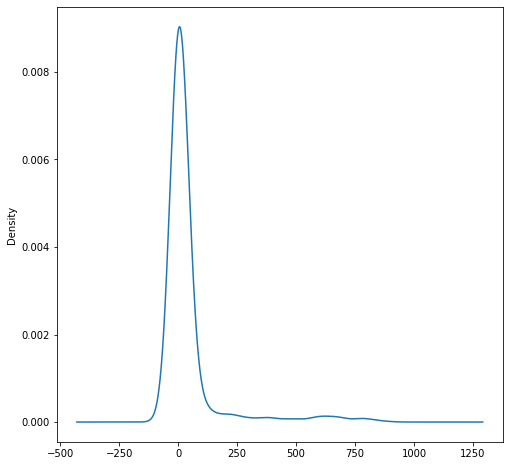

In [260]:
data1['orbit_id'].value_counts().plot(kind='kde', figsize=(8,8))

In [263]:
data1['orbit_id'].describe()

count     22894
unique      521
top       JPL 3
freq        861
Name: orbit_id, dtype: object

In [264]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22894 entries, 0 to 22893
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   neo                         22894 non-null  object 
 1   pha                         22894 non-null  object 
 2   H                           22894 non-null  float64
 3   orbit_id                    22894 non-null  object 
 4   epoch                       22894 non-null  float64
 5   epoch_mjd                   22894 non-null  int64  
 6   epoch_cal                   22894 non-null  float64
 7   Eccentricity                22894 non-null  float64
 8   Semi_Major_Axis             22894 non-null  float64
 9   Perihelion_Distance         22894 non-null  float64
 10  Inclination                 22894 non-null  float64
 11  om                          22894 non-null  float64
 12  w                           22894 non-null  float64
 13  ma                          228

In [265]:
# map the values of pha column to 0 and 1
data1=data1.replace({'pha':{'Y':1,'N':0}})
data1=data1.replace({'neo':{'Y':1,'N':0}})

data1.head()

,neo,pha,H,orbit_id,epoch,epoch_mjd,epoch_cal,Eccentricity,Semi_Major_Axis,Perihelion_Distance,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,Classification,rms
0,1,0,10.4,656,2459000.5,59000,20200531.0,0.222951,1.458046,1.132973,...,4.087800e-08,2.163900e-07,2.439200e-07,3.784900e-07,1.179600e-10,5.555100e-11,6.918600e-07,6.381100e-08,AMO,0.27423
1,1,0,15.4,JPL 214,2459000.5,59000,20200531.0,0.546558,2.638602,1.196452,...,2.910800e-06,1.657500e-05,1.682700e-05,2.521300e-06,3.914800e-09,3.309000e-10,1.030600e-05,2.252800e-06,AMO,0.39148
2,1,0,13.8,223,2459000.5,59000,20200531.0,0.570332,2.473737,1.062886,...,5.204700e-06,2.722800e-05,2.832100e-05,1.215100e-05,1.077600e-08,1.054100e-09,4.898000e-05,5.913600e-06,AMO,0.50197
3,1,0,9.4,783,2459000.5,59000,20200531.0,0.533046,2.664725,1.244303,...,4.053800e-06,7.192300e-06,7.608300e-06,2.395500e-06,3.708300e-09,3.085200e-10,1.055200e-05,2.163400e-06,AMO,0.38253
4,1,0,17.7,JPL 88,2459000.5,59000,20200531.0,0.435285,1.919498,1.083970,...,5.737300e-06,2.693700e-05,2.839900e-05,8.195300e-06,1.558800e-09,3.145500e-10,2.209100e-05,8.244200e-07,AMO,0.46287


In [266]:
data1.isnull().sum()

neo                           0
pha                           0
H                             0
orbit_id                      0
epoch                         0
epoch_mjd                     0
epoch_cal                     0
Eccentricity                  0
Semi_Major_Axis               0
Perihelion_Distance           0
Inclination                   0
om                            0
w                             0
ma                            0
ad                            0
Mean_Motion                   0
Time_of_Perihelion_Passage    0
tp_cal                        0
Period_Days                   0
Period_Years                  0
moid                          0
moid_ld                       0
sigma_e                       0
sigma_a                       0
sigma_q                       0
sigma_i                       0
sigma_om                      0
sigma_w                       0
sigma_ma                      0
sigma_ad                      0
sigma_n                       0
sigma_tp

### *Encoding the categorical data*

In [267]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data1['Classification'])
encoder = le.transform(data1['Classification'])
print(encoder)

[0 0 0 ... 1 1 1]


In [268]:
data1['Classification'] = encoder


In [269]:
data1['Classification'].value_counts()

1    12687
0     8456
2     1729
3       22
Name: Classification, dtype: int64

In [270]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22894 entries, 0 to 22893
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   neo                         22894 non-null  int64  
 1   pha                         22894 non-null  int64  
 2   H                           22894 non-null  float64
 3   orbit_id                    22894 non-null  object 
 4   epoch                       22894 non-null  float64
 5   epoch_mjd                   22894 non-null  int64  
 6   epoch_cal                   22894 non-null  float64
 7   Eccentricity                22894 non-null  float64
 8   Semi_Major_Axis             22894 non-null  float64
 9   Perihelion_Distance         22894 non-null  float64
 10  Inclination                 22894 non-null  float64
 11  om                          22894 non-null  float64
 12  w                           22894 non-null  float64
 13  ma                          228

In [271]:
# label encoding the orbit_id column
data1['orbit_id'] = le.fit_transform(data1['orbit_id'])

In [272]:
print(data1['orbit_id'].value_counts())
print("No of unique orbit_id is: ",data1['orbit_id'].nunique())

405    861
246    794
436    793
475    781
344    763
      ... 
123      1
326      1
411      1
450      1
206      1
Name: orbit_id, Length: 521, dtype: int64
No of unique orbit_id is:  521


In [273]:
data1.shape

(22894, 35)

In [274]:
data1.head(5)

,neo,pha,H,orbit_id,epoch,epoch_mjd,epoch_cal,Eccentricity,Semi_Major_Axis,Perihelion_Distance,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,Classification,rms
0,1,0,10.4,206,2459000.5,59000,20200531.0,0.222951,1.458046,1.132973,...,4.087800e-08,2.163900e-07,2.439200e-07,3.784900e-07,1.179600e-10,5.555100e-11,6.918600e-07,6.381100e-08,0,0.27423
1,1,0,15.4,357,2459000.5,59000,20200531.0,0.546558,2.638602,1.196452,...,2.910800e-06,1.657500e-05,1.682700e-05,2.521300e-06,3.914800e-09,3.309000e-10,1.030600e-05,2.252800e-06,0,0.39148
2,1,0,13.8,117,2459000.5,59000,20200531.0,0.570332,2.473737,1.062886,...,5.204700e-06,2.722800e-05,2.832100e-05,1.215100e-05,1.077600e-08,1.054100e-09,4.898000e-05,5.913600e-06,0,0.50197
3,1,0,9.4,222,2459000.5,59000,20200531.0,0.533046,2.664725,1.244303,...,4.053800e-06,7.192300e-06,7.608300e-06,2.395500e-06,3.708300e-09,3.085200e-10,1.055200e-05,2.163400e-06,0,0.38253
4,1,0,17.7,508,2459000.5,59000,20200531.0,0.435285,1.919498,1.083970,...,5.737300e-06,2.693700e-05,2.839900e-05,8.195300e-06,1.558800e-09,3.145500e-10,2.209100e-05,8.244200e-07,0,0.46287


In [275]:
data1.isnull().sum()

neo                           0
pha                           0
H                             0
orbit_id                      0
epoch                         0
epoch_mjd                     0
epoch_cal                     0
Eccentricity                  0
Semi_Major_Axis               0
Perihelion_Distance           0
Inclination                   0
om                            0
w                             0
ma                            0
ad                            0
Mean_Motion                   0
Time_of_Perihelion_Passage    0
tp_cal                        0
Period_Days                   0
Period_Years                  0
moid                          0
moid_ld                       0
sigma_e                       0
sigma_a                       0
sigma_q                       0
sigma_i                       0
sigma_om                      0
sigma_w                       0
sigma_ma                      0
sigma_ad                      0
sigma_n                       0
sigma_tp

In [276]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22894 entries, 0 to 22893
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   neo                         22894 non-null  int64  
 1   pha                         22894 non-null  int64  
 2   H                           22894 non-null  float64
 3   orbit_id                    22894 non-null  int32  
 4   epoch                       22894 non-null  float64
 5   epoch_mjd                   22894 non-null  int64  
 6   epoch_cal                   22894 non-null  float64
 7   Eccentricity                22894 non-null  float64
 8   Semi_Major_Axis             22894 non-null  float64
 9   Perihelion_Distance         22894 non-null  float64
 10  Inclination                 22894 non-null  float64
 11  om                          22894 non-null  float64
 12  w                           22894 non-null  float64
 13  ma                          228

## *Data Visualization And Interpreting its results*

In [277]:
data1.head()

,neo,pha,H,orbit_id,epoch,epoch_mjd,epoch_cal,Eccentricity,Semi_Major_Axis,Perihelion_Distance,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,Classification,rms
0,1,0,10.4,206,2459000.5,59000,20200531.0,0.222951,1.458046,1.132973,...,4.087800e-08,2.163900e-07,2.439200e-07,3.784900e-07,1.179600e-10,5.555100e-11,6.918600e-07,6.381100e-08,0,0.27423
1,1,0,15.4,357,2459000.5,59000,20200531.0,0.546558,2.638602,1.196452,...,2.910800e-06,1.657500e-05,1.682700e-05,2.521300e-06,3.914800e-09,3.309000e-10,1.030600e-05,2.252800e-06,0,0.39148
2,1,0,13.8,117,2459000.5,59000,20200531.0,0.570332,2.473737,1.062886,...,5.204700e-06,2.722800e-05,2.832100e-05,1.215100e-05,1.077600e-08,1.054100e-09,4.898000e-05,5.913600e-06,0,0.50197
3,1,0,9.4,222,2459000.5,59000,20200531.0,0.533046,2.664725,1.244303,...,4.053800e-06,7.192300e-06,7.608300e-06,2.395500e-06,3.708300e-09,3.085200e-10,1.055200e-05,2.163400e-06,0,0.38253
4,1,0,17.7,508,2459000.5,59000,20200531.0,0.435285,1.919498,1.083970,...,5.737300e-06,2.693700e-05,2.839900e-05,8.195300e-06,1.558800e-09,3.145500e-10,2.209100e-05,8.244200e-07,0,0.46287


In [278]:
print(data1.columns)
print("N0 of features are: ",len(data1.columns))

Index(['neo', 'pha', 'H', 'orbit_id', 'epoch', 'epoch_mjd', 'epoch_cal',
       'Eccentricity', 'Semi_Major_Axis', 'Perihelion_Distance', 'Inclination',
       'om', 'w', 'ma', 'ad', 'Mean_Motion', 'Time_of_Perihelion_Passage',
       'tp_cal', 'Period_Days', 'Period_Years', 'moid', 'moid_ld', 'sigma_e',
       'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma',
       'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'Classification',
       'rms'],
      dtype='object')
N0 of features are:  35


In [279]:
data['H'].value_counts()

16.800    28602
16.900    28515
16.700    28273
17.000    28029
16.600    27969
          ...  
15.570        1
24.185        1
23.843        1
23.349        1
26.419        1
Name: H, Length: 9489, dtype: int64

### Coorelation Matrix

In [280]:
data1.shape

(22894, 35)

#### *With the help of Coorelation Matrix we can see the coorelation between the features and we can remove the features which are highly coorelated with each other*

In [281]:
data1.corr()

,neo,pha,H,orbit_id,epoch,epoch_mjd,epoch_cal,Eccentricity,Semi_Major_Axis,Perihelion_Distance,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,Classification,rms
neo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pha,NaN,1.000000,-0.294889,-0.071693,0.081643,0.081643,0.082287,0.159158,-0.001293,-0.208413,...,0.010253,0.005343,0.004489,0.013797,-0.002531,0.001649,0.003622,-0.002392,0.169681,-0.002102
H,NaN,-0.294889,1.000000,0.163648,-0.207980,-0.207980,-0.209079,-0.271892,-0.070549,-0.038031,...,-0.011541,-0.000744,-0.001450,-0.009204,-0.009875,-0.005418,-0.008238,-0.004885,0.213433,0.010854
orbit_id,NaN,-0.071693,0.163648,1.000000,-0.521123,-0.521123,-0.522303,0.071347,-0.008713,-0.076249,...,0.037167,0.044933,0.060390,0.031863,0.026137,0.042973,0.015987,-0.004306,0.026147,0.007378
epoch,NaN,0.081643,-0.207980,-0.521123,1.000000,1.000000,0.999323,-0.077004,-0.001948,0.057634,...,-0.050191,-0.045224,-0.071658,-0.047165,-0.035511,-0.057683,-0.028098,-0.002746,-0.024517,0.002146
epoch_mjd,NaN,0.081643,-0.207980,-0.521123,1.000000,1.000000,0.999323,-0.077004,-0.001948,0.057634,...,-0.050191,-0.045224,-0.071658,-0.047165,-0.035511,-0.057683,-0.028098,-0.002746,-0.024517,0.002146
epoch_cal,NaN,0.082287,-0.209079,-0.522303,0.999323,0.999323,1.000000,-0.077021,-0.002176,0.056469,...,-0.050145,-0.045118,-0.071123,-0.046372,-0.035551,-0.058189,-0.027296,-0.002723,-0.023658,0.002161
Eccentricity,NaN,0.159158,-0.271892,0.071347,-0.077004,-0.077004,-0.077021,1.000000,0.180003,-0.390724,...,0.006420,0.003572,-0.017759,-0.002477,0.042862,0.015175,-0.000815,0.025628,0.048956,-0.007615
Semi_Major_Axis,NaN,-0.001293,-0.070549,-0.008713,-0.001948,-0.001948,-0.002176,0.180003,1.000000,0.096237,...,0.001223,0.001407,0.000013,-0.000497,0.674115,0.003169,0.000556,0.955075,-0.118560,-0.001699
Perihelion_Distance,NaN,-0.208413,-0.038031,-0.076249,0.057634,0.057634,0.056469,-0.390724,0.096237,1.000000,...,-0.001295,-0.001066,0.020590,0.002442,0.008199,0.000486,0.008145,0.010019,-0.738372,-0.001089


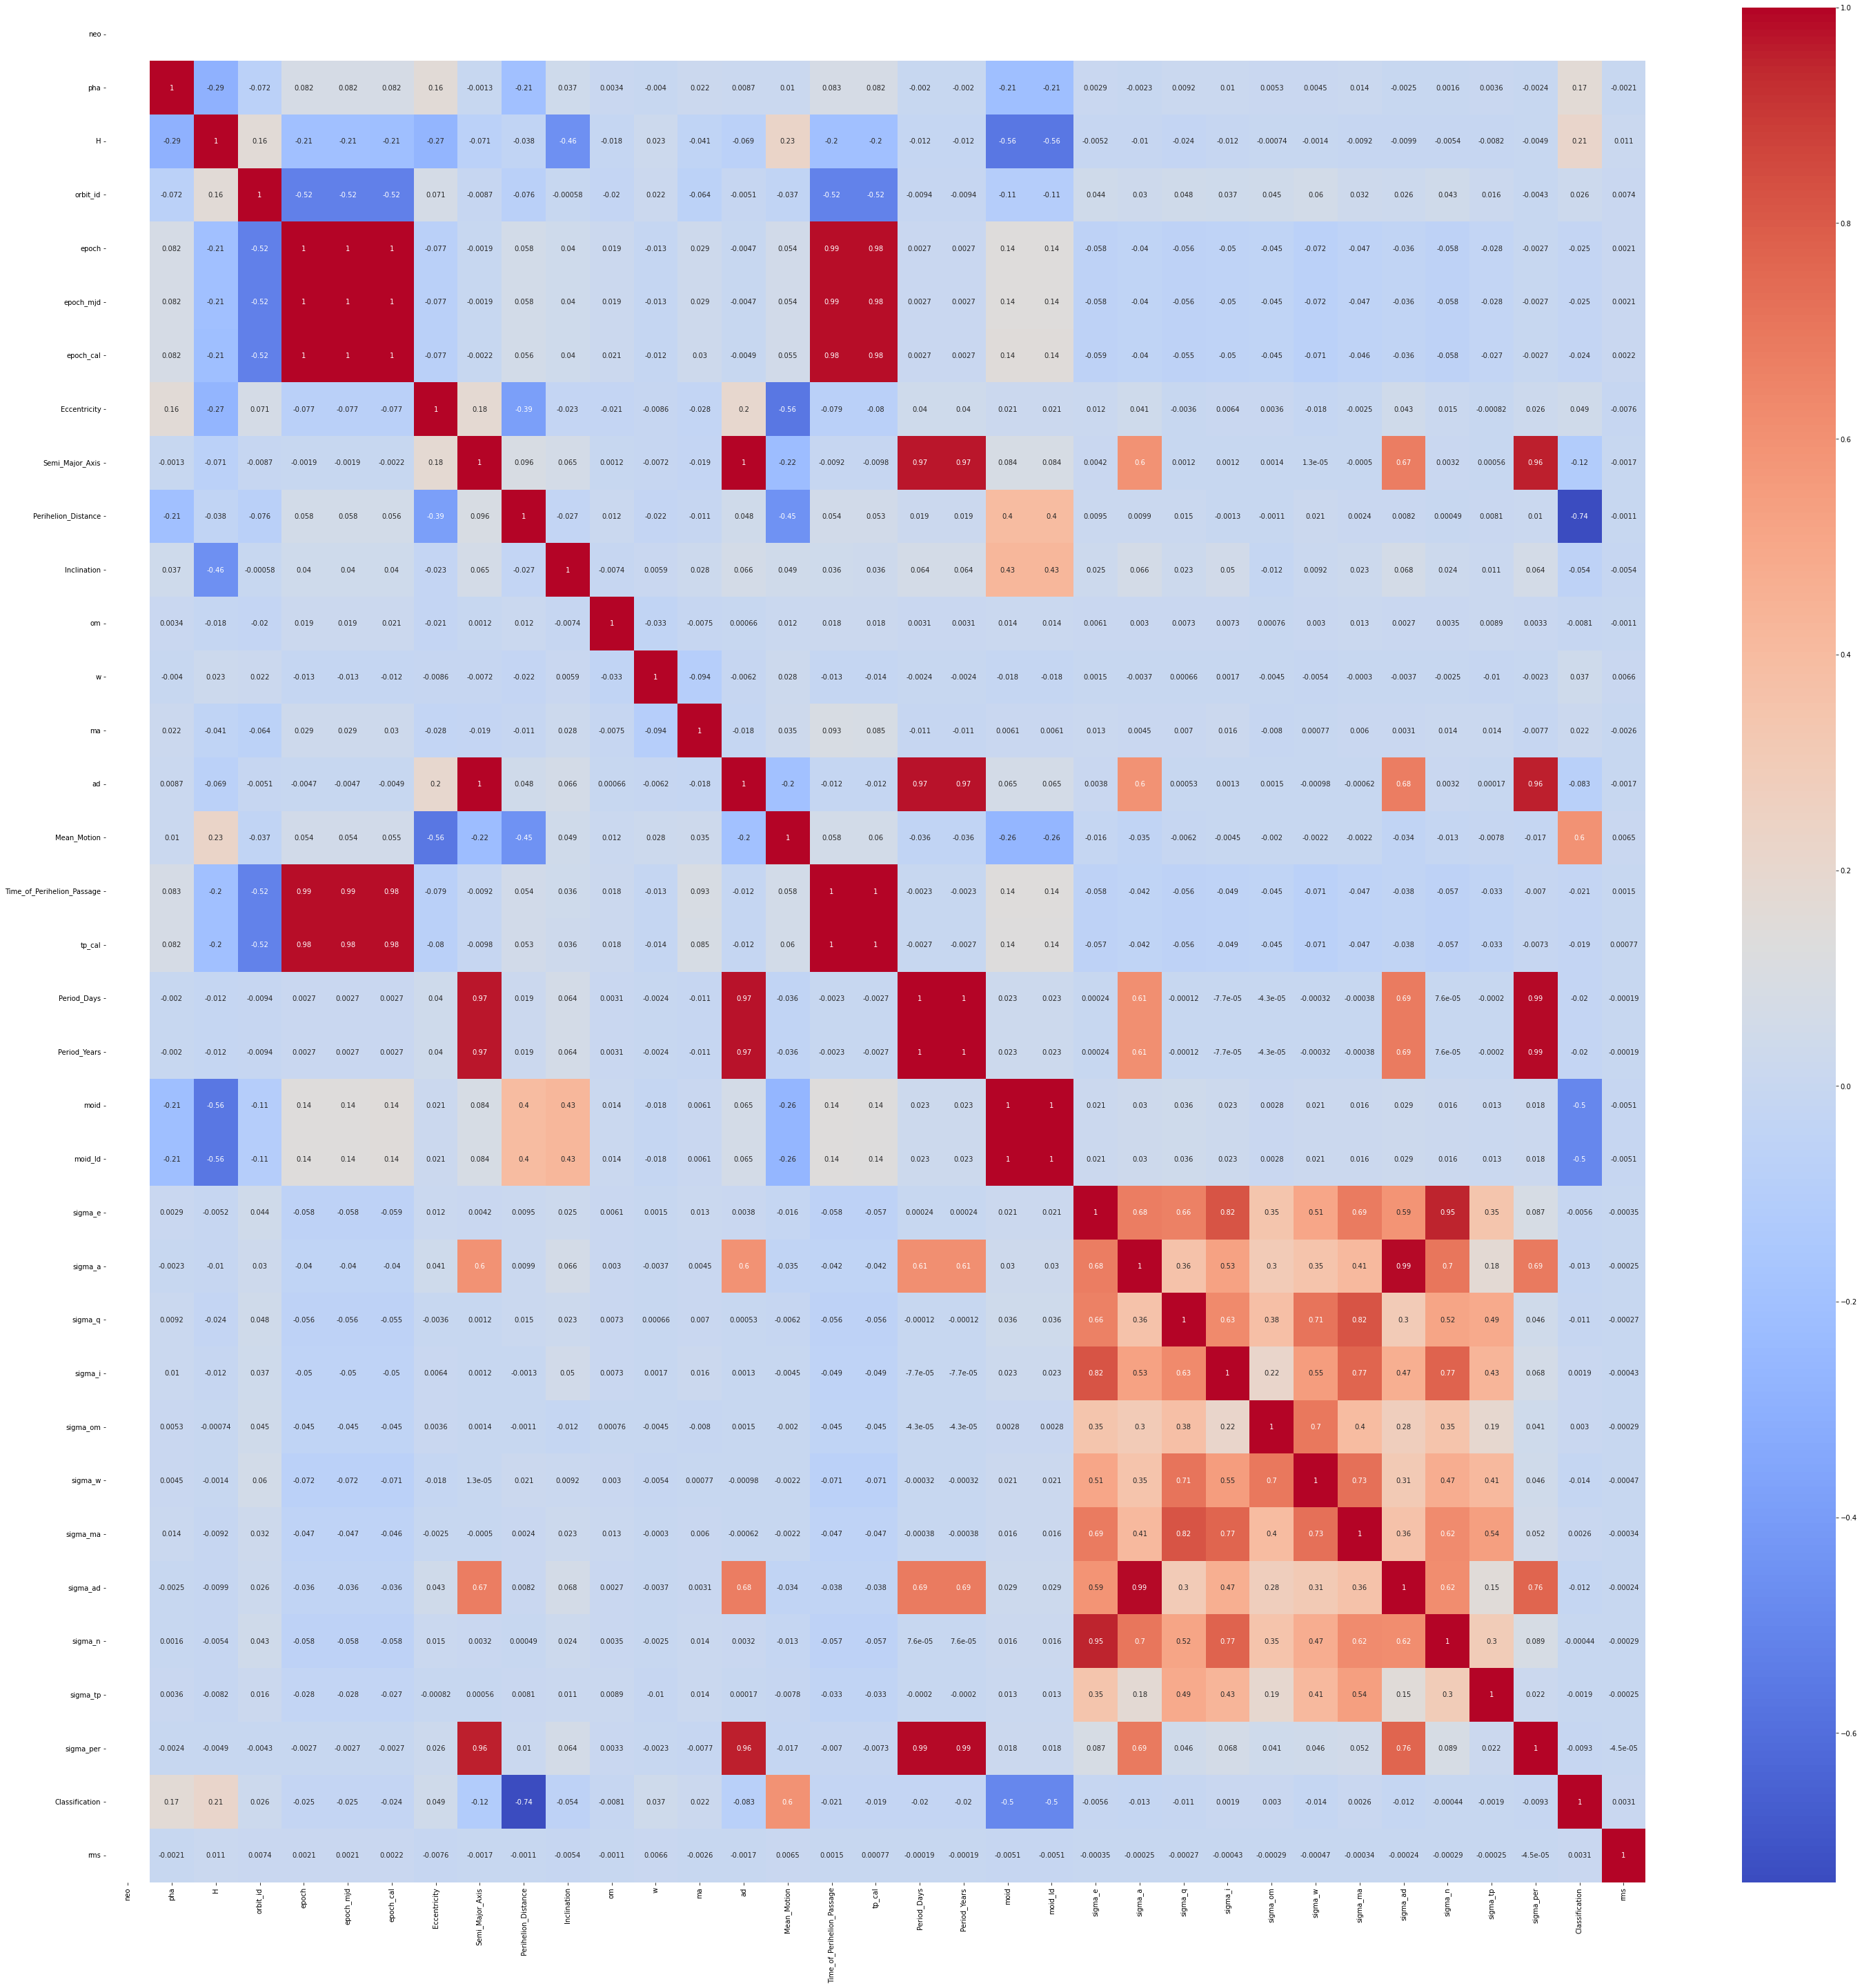

In [282]:
plt.figure(figsize = (50,50))
corr=data1.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.savefig('correlation.png')

In [283]:
# ## Drop the features which have correlation =1

# for i in corr.columns:
#     for j in corr.columns:
#         if corr[i][j]==1 and i!=j:
#             print(i,j)



#### *We are dropping the columns which are highly coorelated with each other*

In [284]:
data1.columns

Index(['neo', 'pha', 'H', 'orbit_id', 'epoch', 'epoch_mjd', 'epoch_cal',
       'Eccentricity', 'Semi_Major_Axis', 'Perihelion_Distance', 'Inclination',
       'om', 'w', 'ma', 'ad', 'Mean_Motion', 'Time_of_Perihelion_Passage',
       'tp_cal', 'Period_Days', 'Period_Years', 'moid', 'moid_ld', 'sigma_e',
       'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma',
       'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'Classification',
       'rms'],
      dtype='object')

In [285]:
data1=data1.drop(['epoch_mjd','epoch_cal','Semi_Major_Axis','ad','tp_cal','Period_Days','moid','sigma_a','sigma_w','sigma_ad','sigma_tp','sigma_per'], axis=1)

data1.reset_index(drop=True, inplace=True)

In [286]:
data1.head()

,neo,pha,H,orbit_id,epoch,Eccentricity,Perihelion_Distance,Inclination,om,w,...,Period_Years,moid_ld,sigma_e,sigma_q,sigma_i,sigma_om,sigma_ma,sigma_n,Classification,rms
0,1,0,10.4,206,2459000.5,0.222951,1.132973,10.830543,304.299327,178.882294,...,1.760617,57.839613,1.285600e-10,2.616800e-10,4.087800e-08,2.163900e-07,3.784900e-07,5.555100e-11,0,0.27423
1,1,0,15.4,357,2459000.5,0.546558,1.196452,11.567485,183.866950,156.176338,...,4.286167,79.189090,2.178400e-08,5.811600e-08,2.910800e-06,1.657500e-05,2.521300e-06,3.309000e-10,0,0.39148
2,1,0,13.8,117,2459000.5,0.570332,1.062886,9.393854,110.434218,350.495585,...,3.890796,31.996351,4.362700e-08,1.097300e-07,5.204700e-06,2.722800e-05,1.215100e-05,1.054100e-09,0,0.50197
3,1,0,9.4,222,2459000.5,0.533046,1.244303,26.677643,215.546826,132.364631,...,4.349974,134.246527,2.430100e-08,6.479000e-08,4.053800e-06,7.192300e-06,2.395500e-06,3.085200e-10,0,0.38253
4,1,0,17.7,508,2459000.5,0.435285,1.083970,11.876537,171.326998,26.694797,...,2.659437,41.816706,4.305600e-08,8.311600e-08,5.737300e-06,2.693700e-05,8.195300e-06,3.145500e-10,0,0.46287


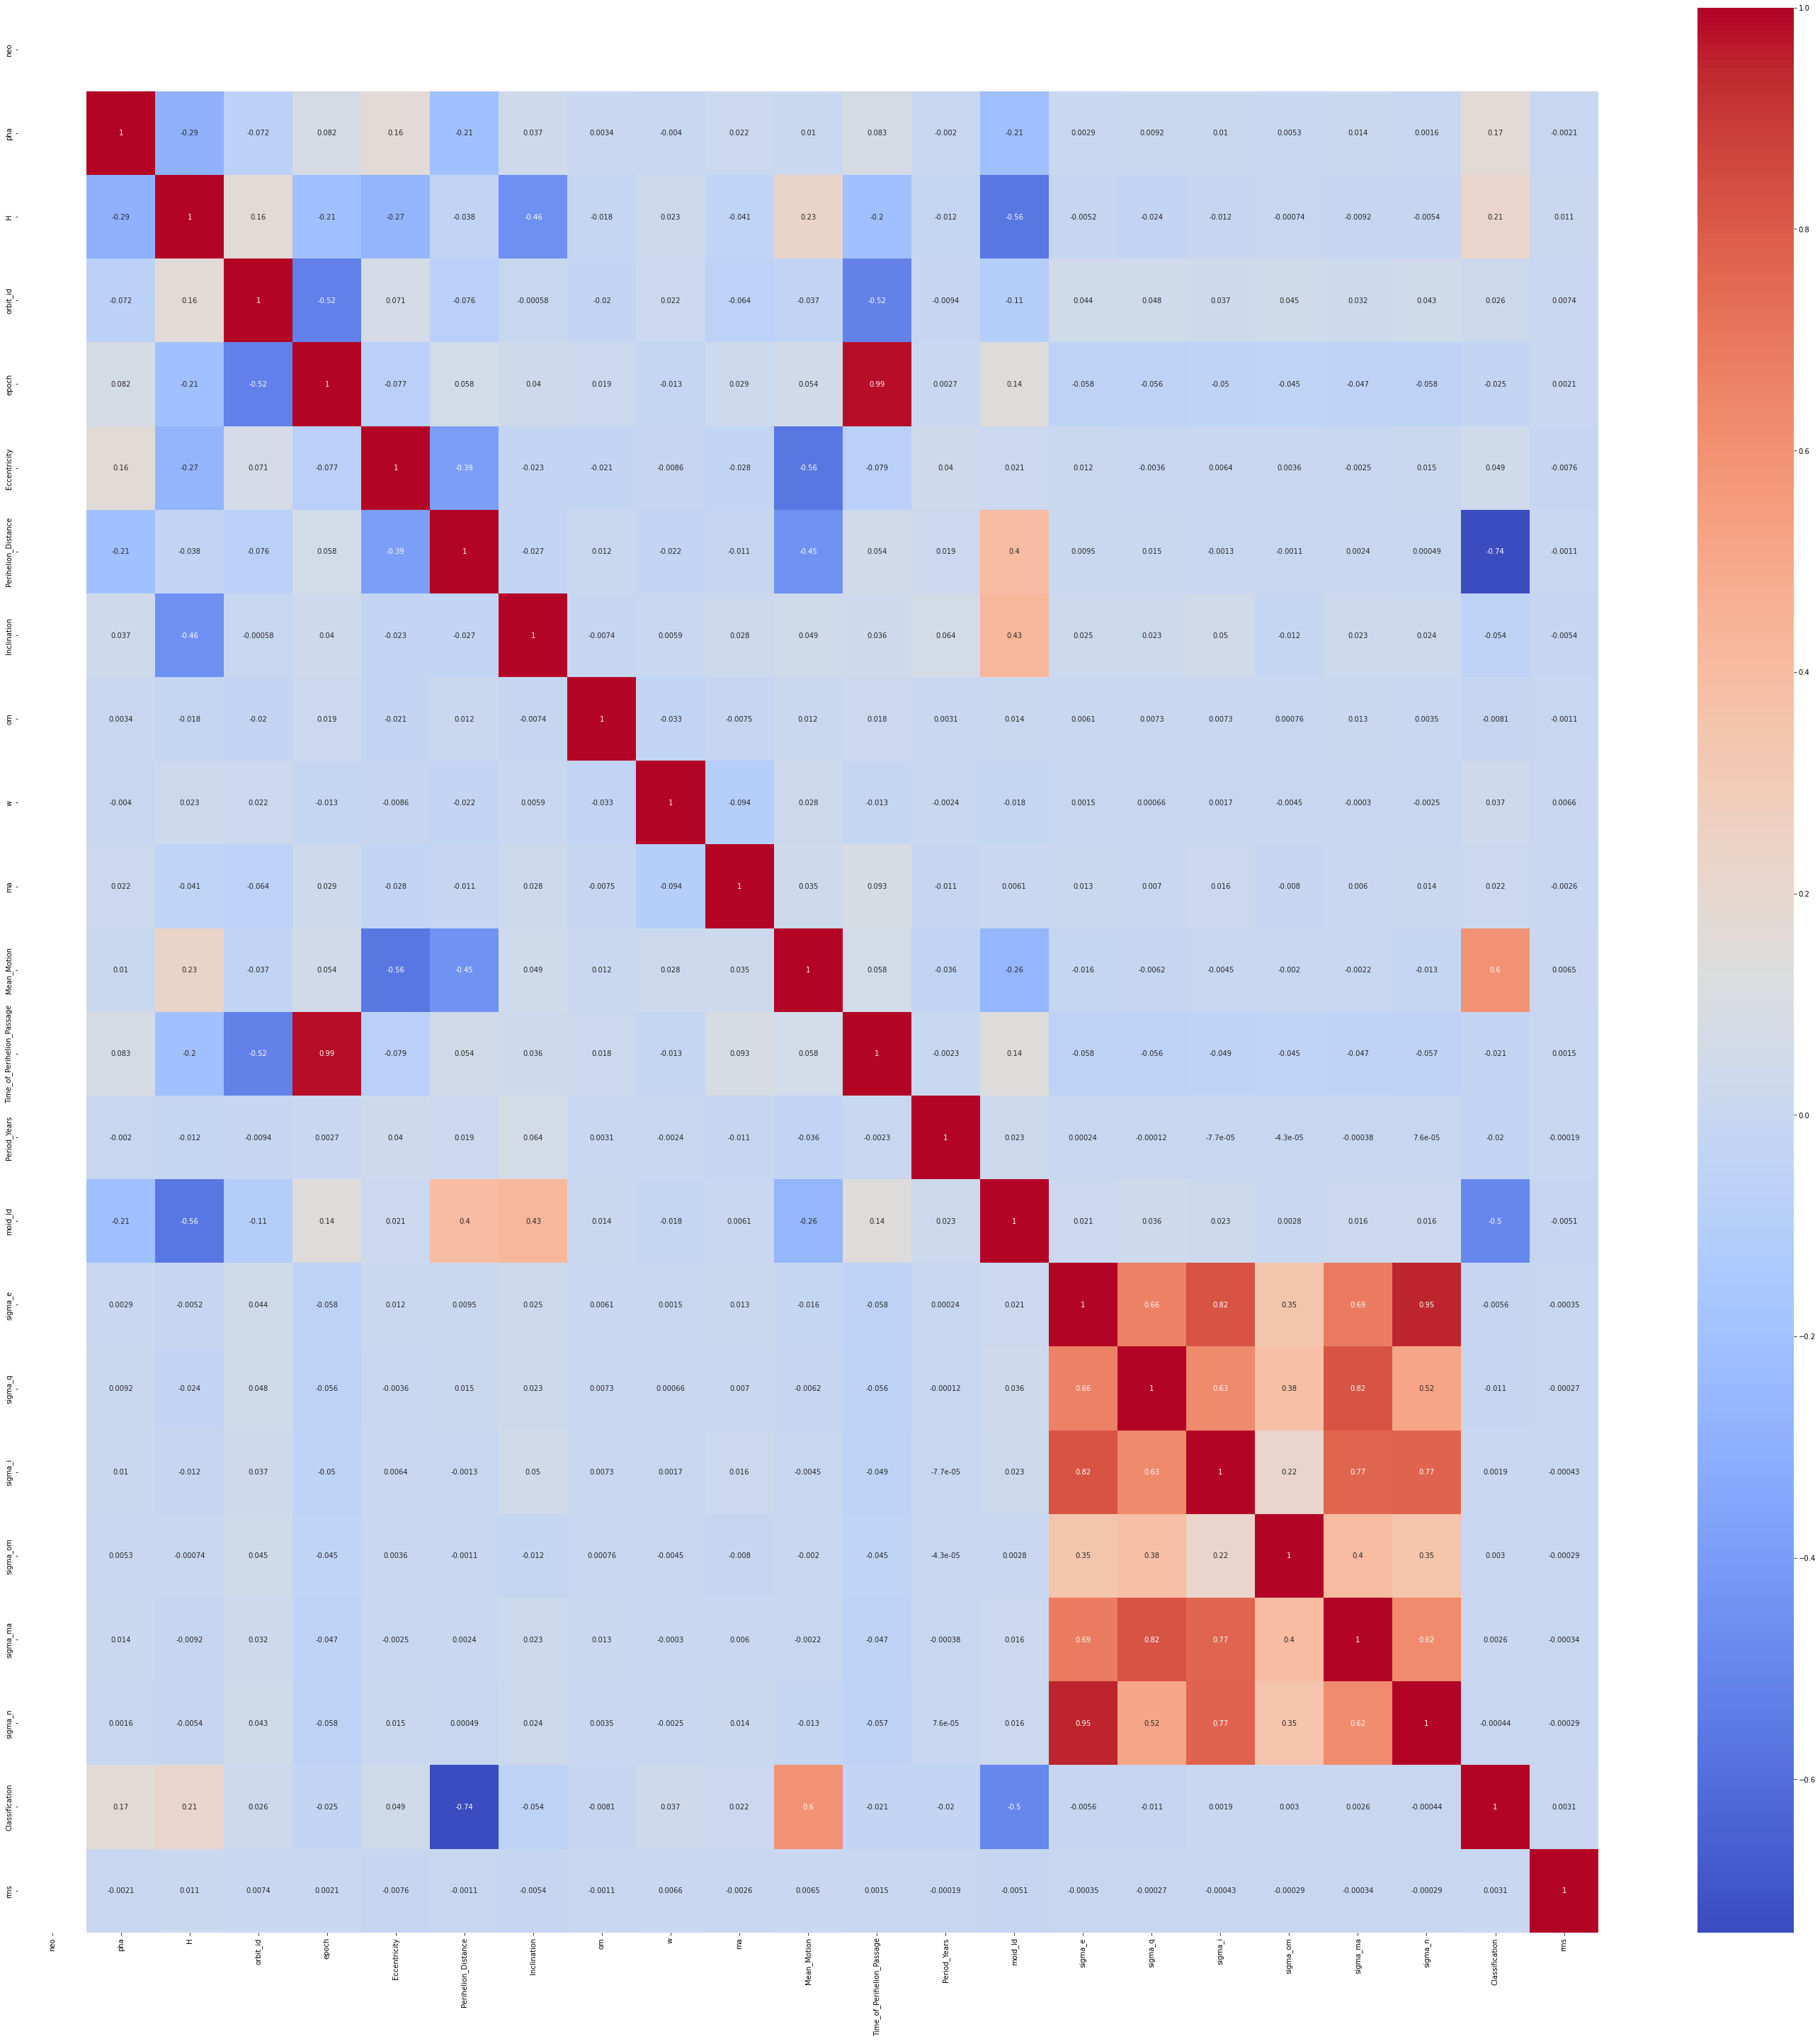

In [287]:
# Drawing the correlation matrix once again to check if we need to drop any more features
plt.figure(figsize = (50,50))
corr=data1.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.savefig('correlation.png')


In [288]:
data1=data1.drop(['Perihelion_Distance','epoch','sigma_n'],axis=1)

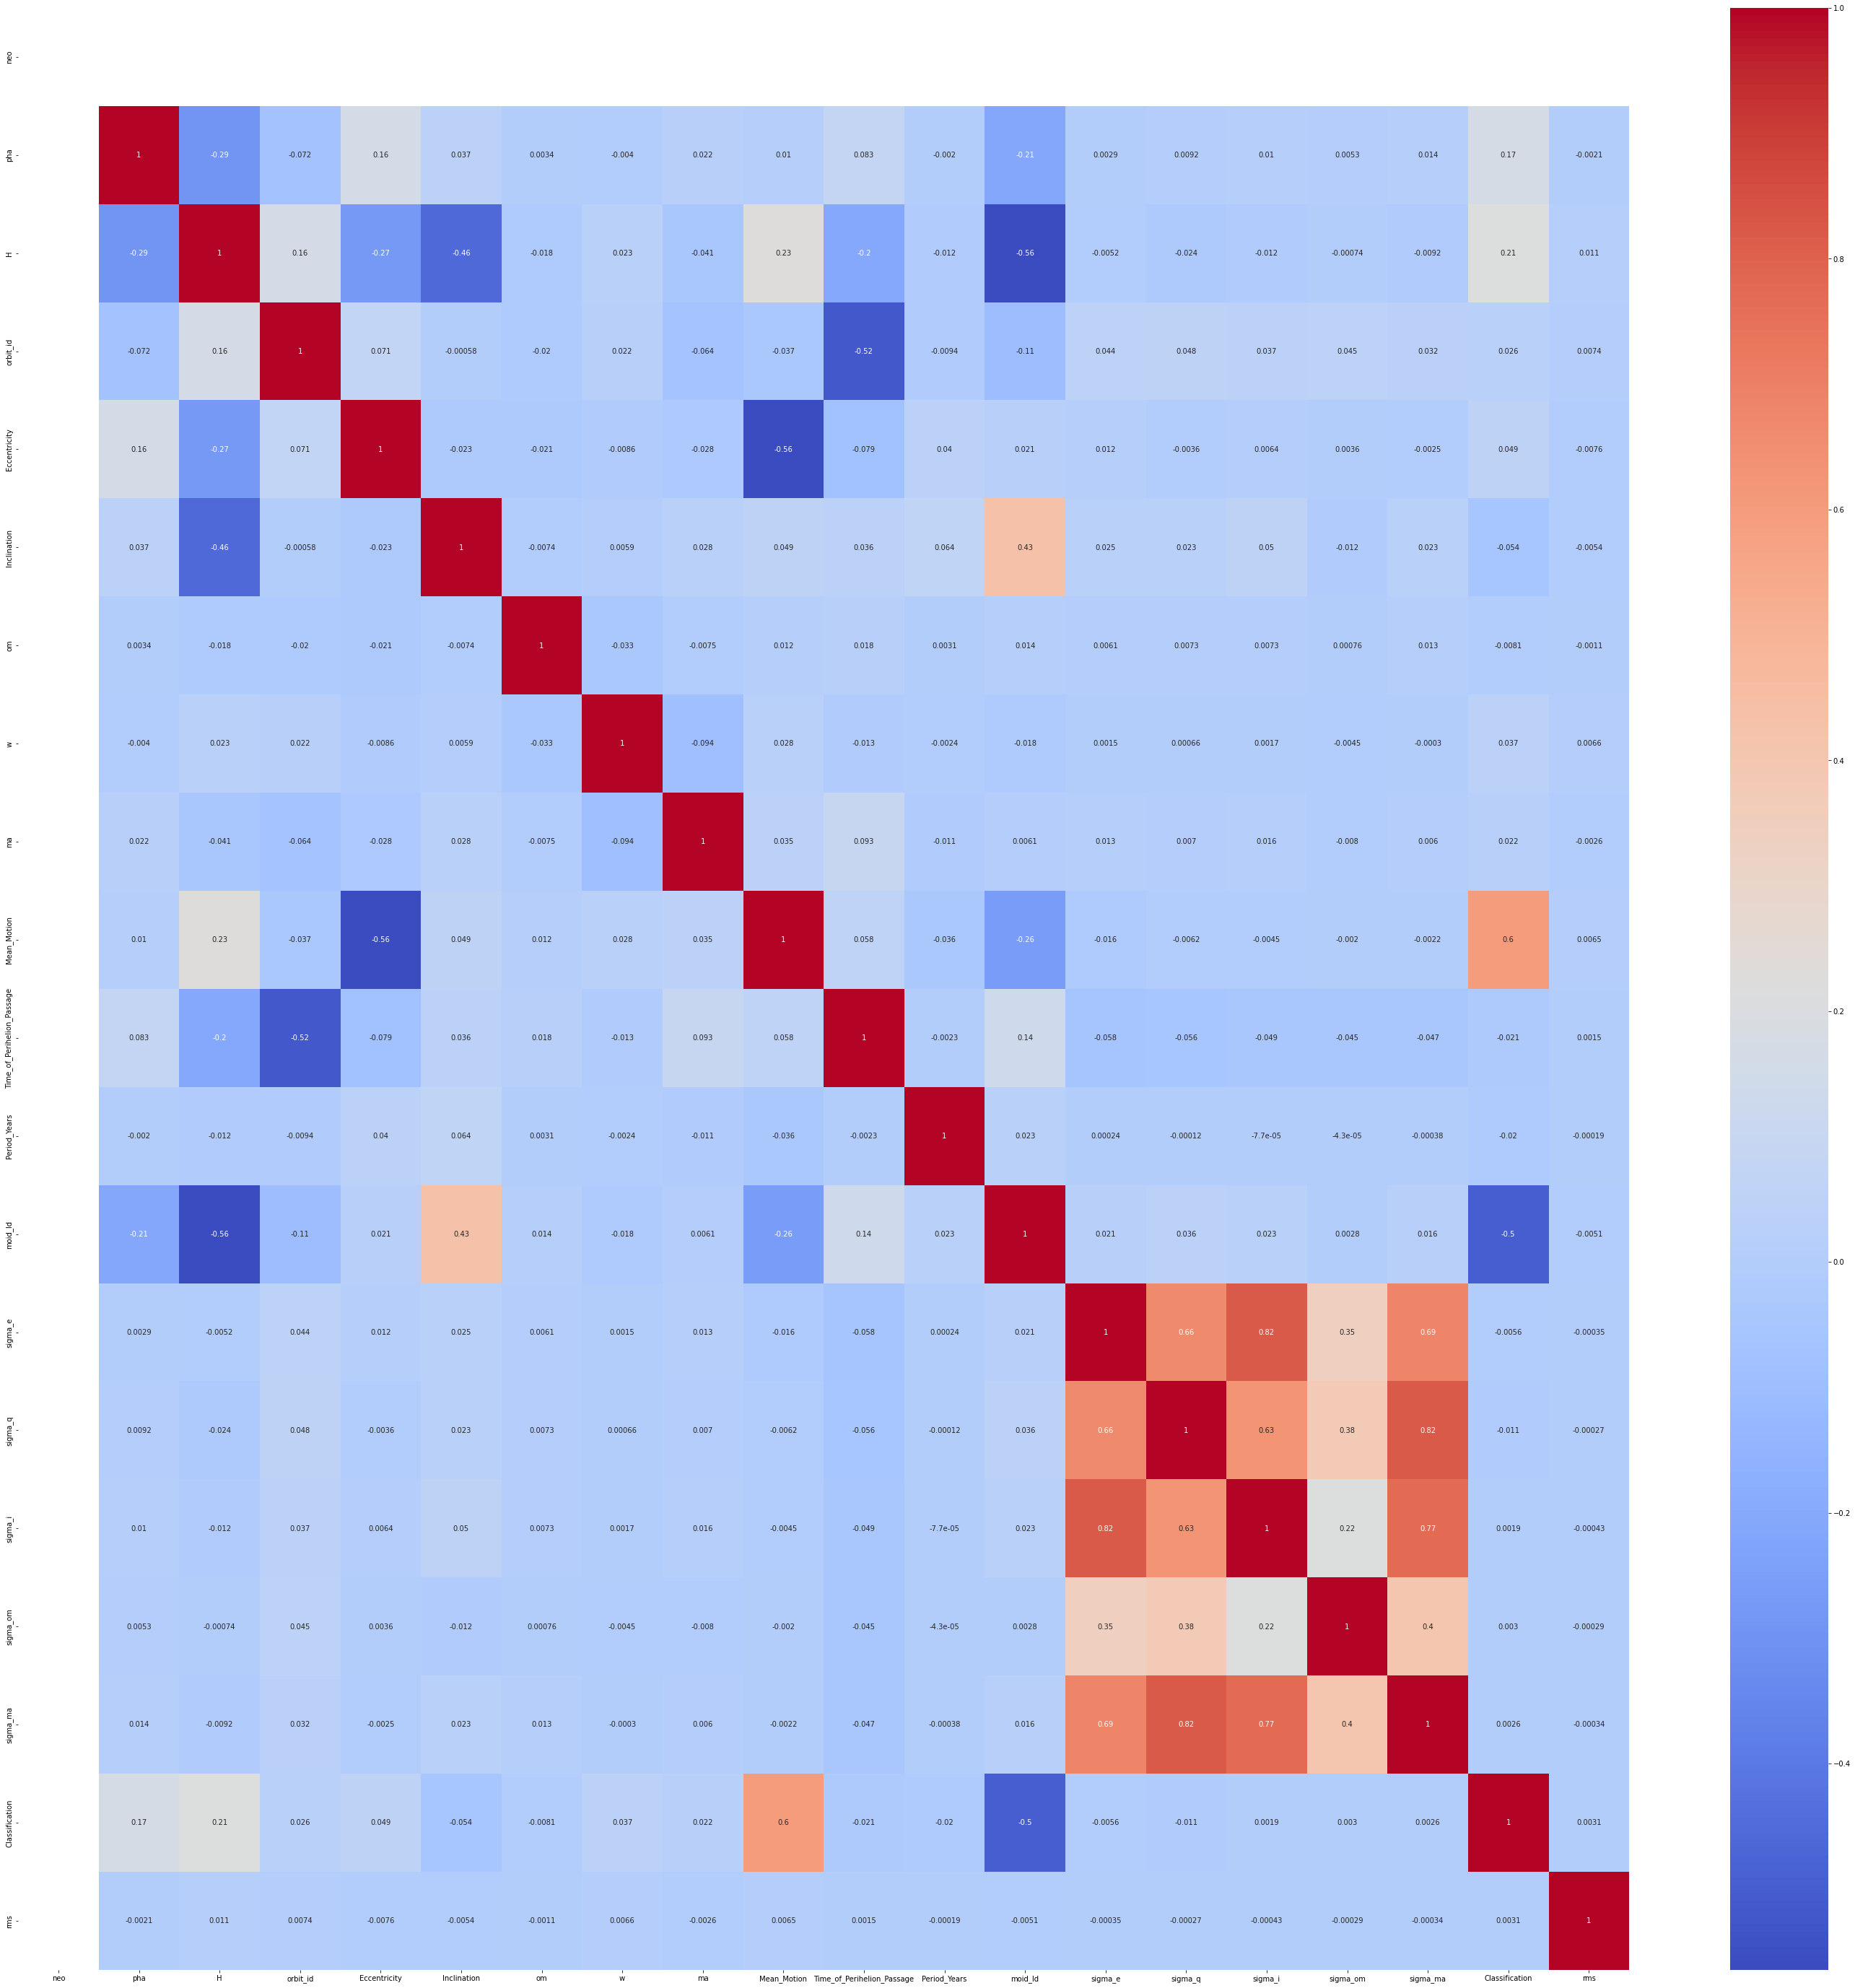

In [289]:
plt.figure(figsize = (50,50))
corr=data1.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.savefig('correlation.png')

##### *As you can see we have removed all highly coorelated features now we can continue with the model building and visualization*

In [290]:
data1.shape

(22894, 20)

### *Data Distribution for all Attributes*

In [291]:
data1.columns

Index(['neo', 'pha', 'H', 'orbit_id', 'Eccentricity', 'Inclination', 'om', 'w',
       'ma', 'Mean_Motion', 'Time_of_Perihelion_Passage', 'Period_Years',
       'moid_ld', 'sigma_e', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_ma',
       'Classification', 'rms'],
      dtype='object')

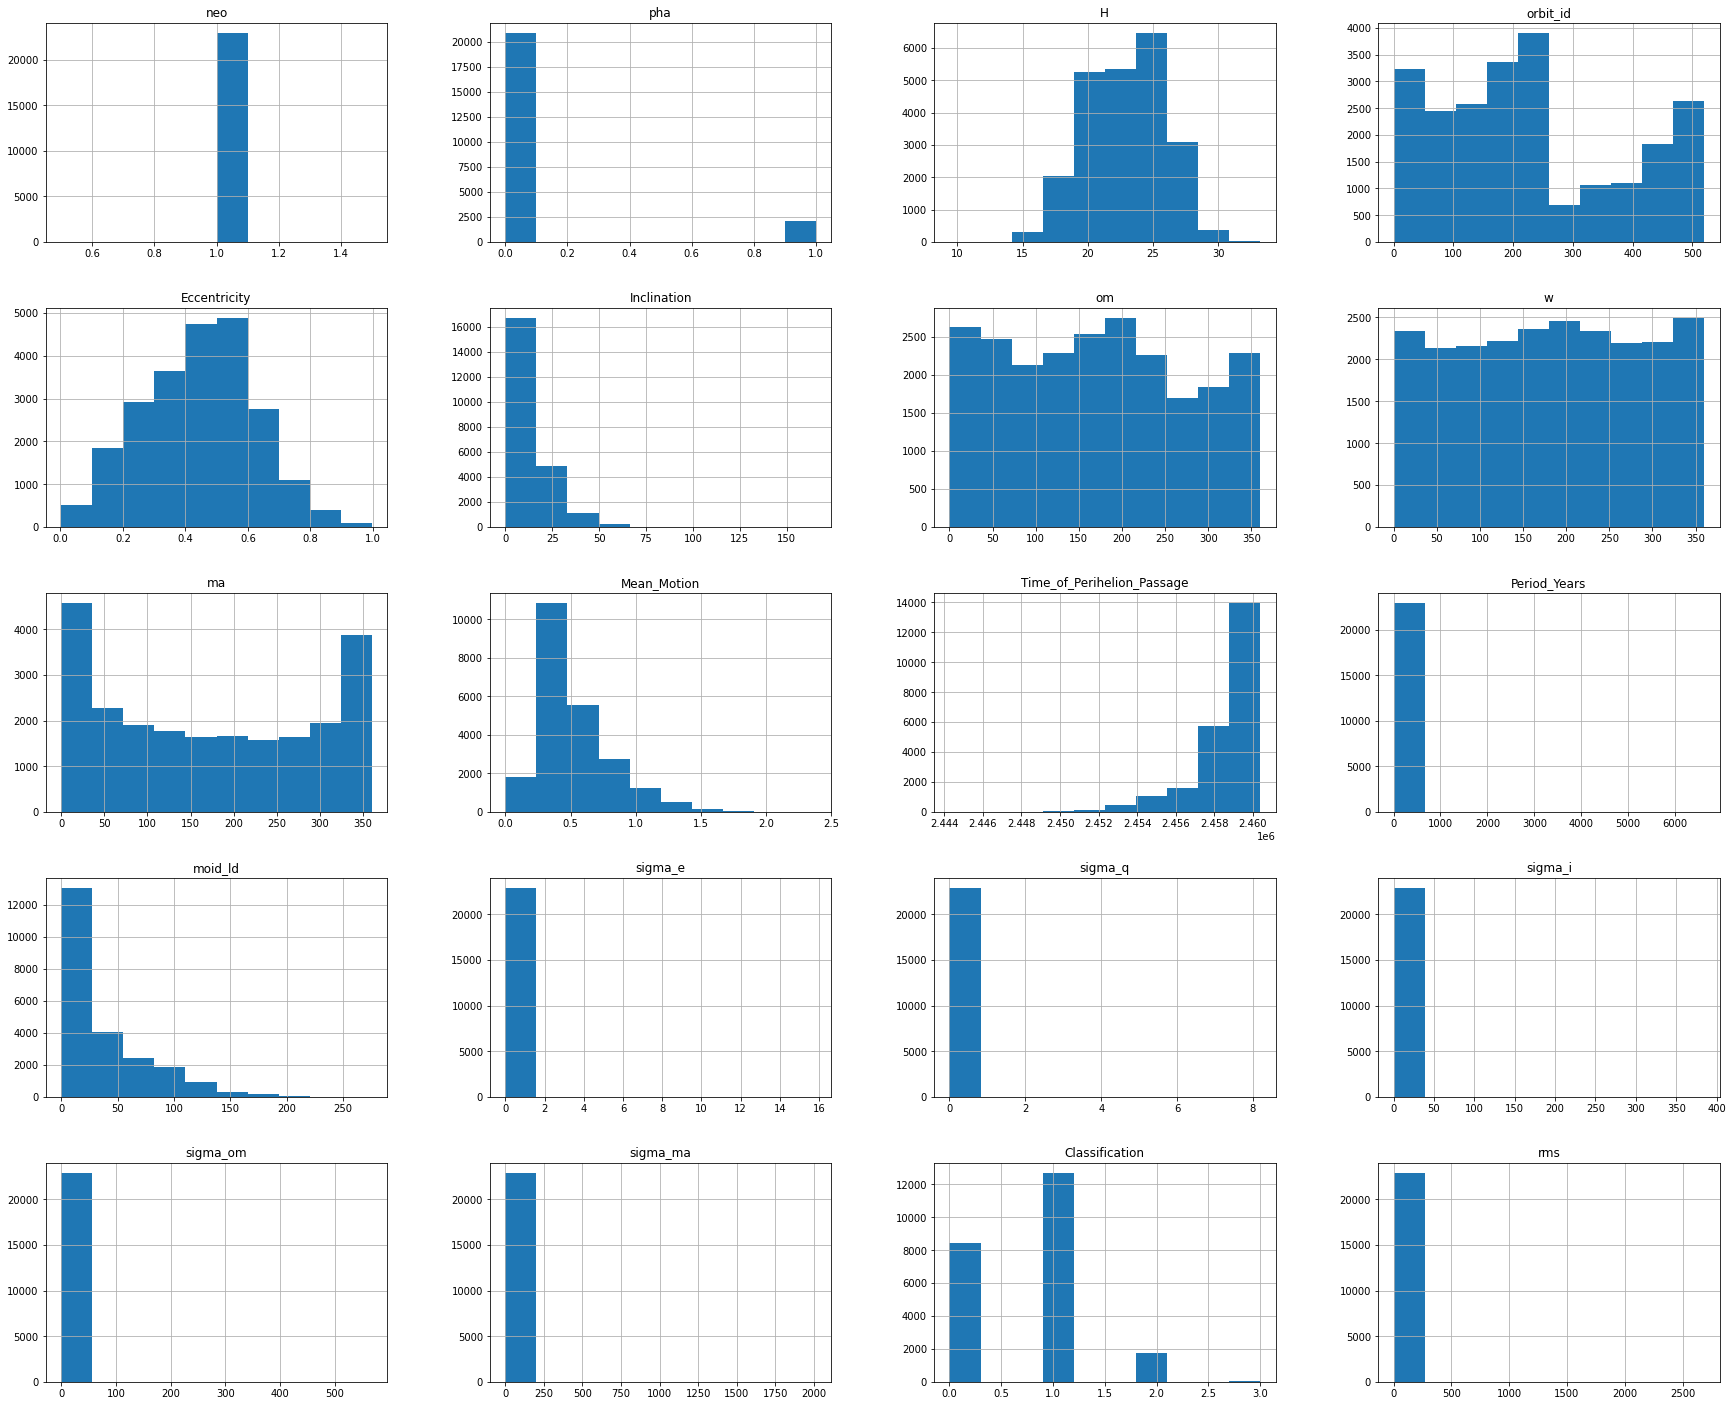

In [292]:
data1.hist(figsize=(30,25))
plt.show()

In [293]:
data1.shape

(22894, 20)

In [294]:
data1.columns

Index(['neo', 'pha', 'H', 'orbit_id', 'Eccentricity', 'Inclination', 'om', 'w',
       'ma', 'Mean_Motion', 'Time_of_Perihelion_Passage', 'Period_Years',
       'moid_ld', 'sigma_e', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_ma',
       'Classification', 'rms'],
      dtype='object')

### *Feature :**neo***

#### *After Preprocessing Now all the asteroids in the dataset have True for  near earth objects in the dataset*

In [295]:
plt.figure(figsize = (20,20))
data1['neo'].value_counts()

1    22894
Name: neo, dtype: int64

<Figure size 1440x1440 with 0 Axes>

In [296]:
data1[data1['neo']==1]['pha'].value_counts()

0    20828
1     2066
Name: pha, dtype: int64

In [297]:
data1['neo'].value_counts()

1    22894
Name: neo, dtype: int64

### *Now this Feature neo is of no use to us*

In [298]:
data1=data1.drop(['neo'], axis=1)
data1.reset_index(drop=True, inplace=True)


In [299]:
data1.shape

(22894, 19)

<AxesSubplot:xlabel='pha', ylabel='count'>

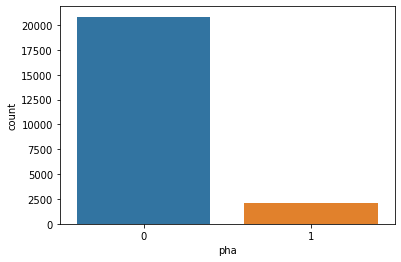

In [300]:
sns.countplot(x='pha',data=data1)

### *Feature : **H***

c:\Users\vardh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


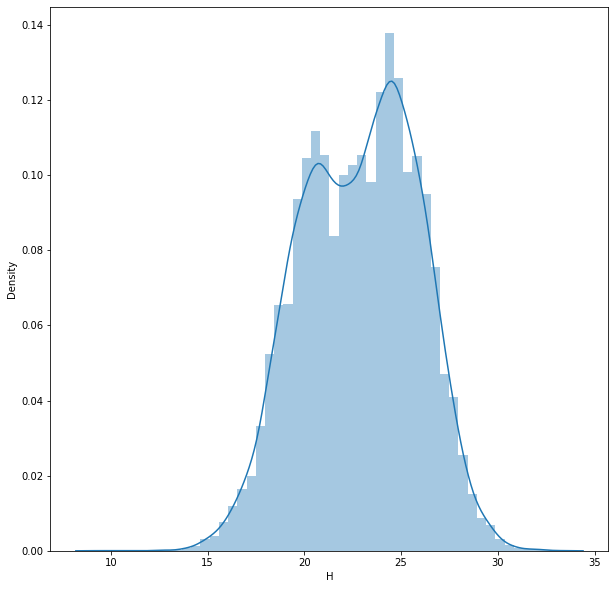

In [301]:
plt.figure(figsize = (10,10))
sns.distplot(data1['H'])
plt.show()

#### *We can see that the value of H is more at 16 to 18*

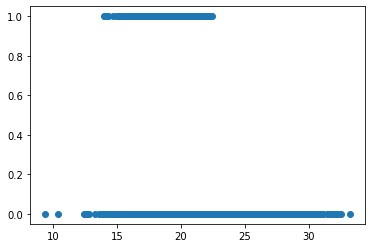

In [302]:
plt.scatter(data1['H'],data1['pha'])

In [303]:
# for h value greaer than 25 what is the percentage of pha

data1[data1['H']>23]['pha'].value_counts()

0    11506
Name: pha, dtype: int64

#### *From this we can see that if value is greater than 23 of H the corresponding asteriod cannot be hazardous*

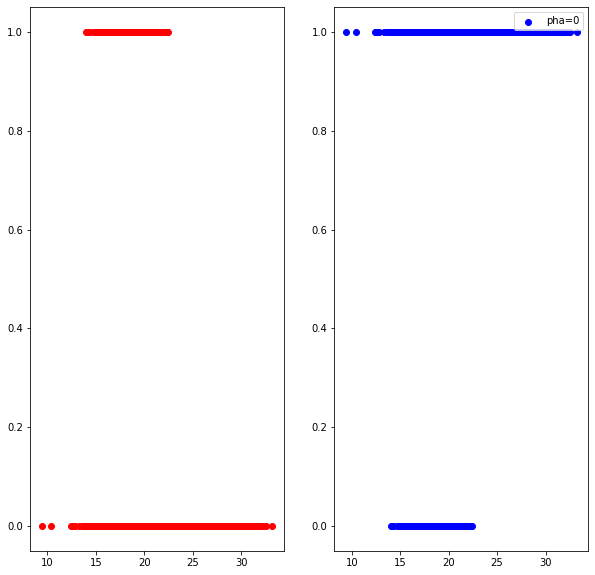

In [304]:
plt.figure(figsize = (10,10))

plt.subplot(1,2,1)

plt.scatter(data1['H'],data1['pha']==1, color='red', label='pha=1')

plt.subplot(1,2,2)
plt.scatter(data1['H'],data1['pha']==0, color='blue', label='pha=0')

plt.legend()

##### *From the above data we can see that For h Values of 15 to 20 they have higher chance to be Potentially Hazardous Asteroid,Along with for values of greater than 15 we can see that it might be a near earth object*

In [305]:
data1['pha'].value_counts()

0    20828
1     2066
Name: pha, dtype: int64

### *Feature : **orbit_id***

c:\Users\vardh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


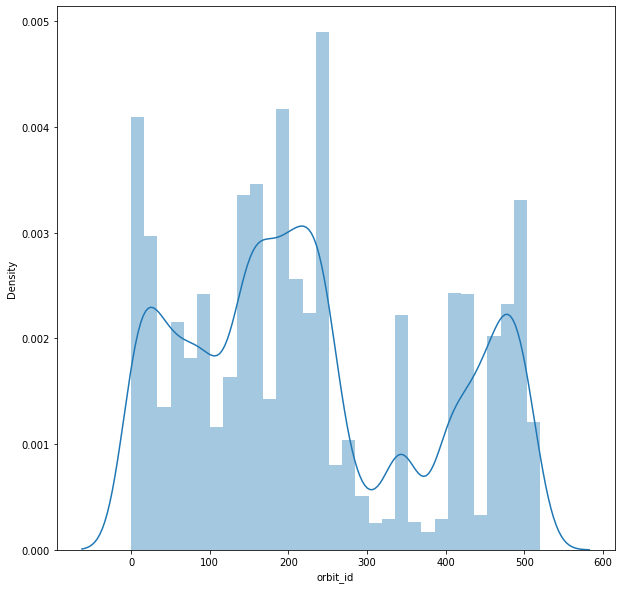

In [306]:
plt.figure(figsize = (10,10))
sns.distplot(data1['orbit_id'])
plt.show()

#### *We can see that orbit_id less than 250 have more density or are more in number*

In [307]:
data1['orbit_id'].value_counts()

405    861
246    794
436    793
475    781
344    763
      ... 
123      1
326      1
411      1
450      1
206      1
Name: orbit_id, Length: 521, dtype: int64

<AxesSubplot:xlabel='orbit_id', ylabel='count'>

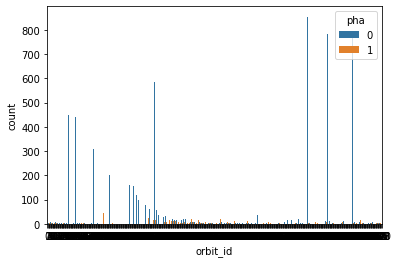

In [308]:
sns.countplot(x='orbit_id',hue='pha',data=data1)

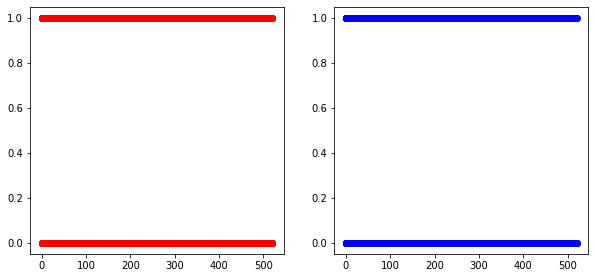

In [309]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)

plt.scatter(data1['orbit_id'],data1['pha']==1, color='red', label='pha=1')

plt.subplot(2,2,2)
plt.scatter(data1['orbit_id'],data1['pha']==0, color='blue', label='pha=0')

plt.show()

#### *We cannot infer much from the above graph*

In [310]:
data1[data1['pha']==1]['orbit_id'].value_counts()

80     48
87     45
72     42
54     41
153    39
       ..
505     1
251     1
326     1
88      1
59      1
Name: orbit_id, Length: 328, dtype: int64

#### *We can see when the value of epoch is more than 2.45e6 the chances of being a hazardous asteroid is more*

### *Feature : **Eccentricity***

c:\Users\vardh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


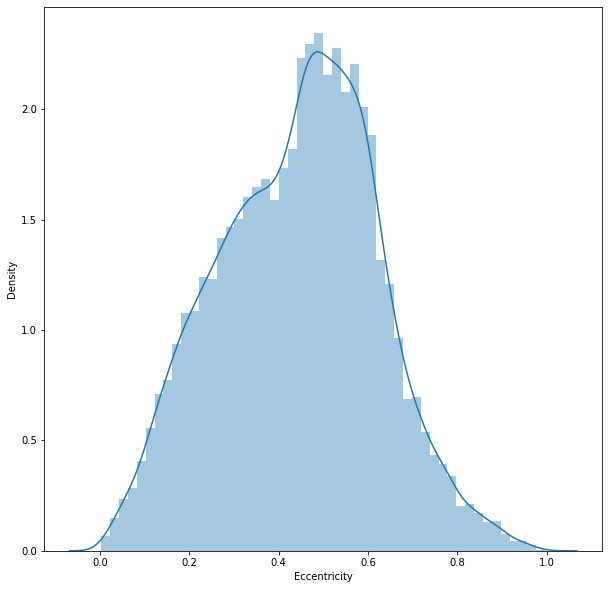

In [311]:
plt.figure(figsize = (10,10))
sns.distplot(data1['Eccentricity'])
plt.show()

#### *We can see the eccentricity for most asteroids is less than 0.4*

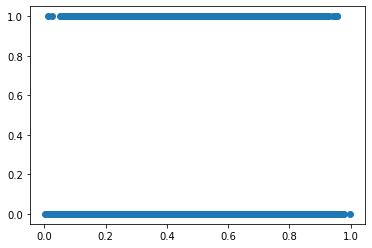

In [312]:
plt.scatter(data1['Eccentricity'],data1['pha'])

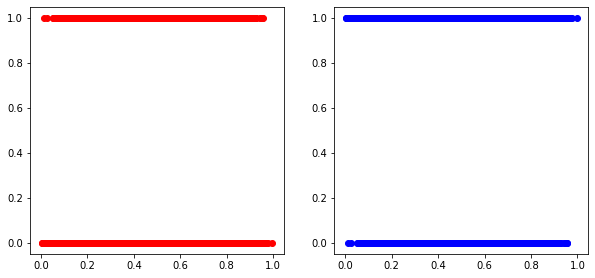

In [313]:
plt.figure(figsize = (10,10))


plt.subplot(2,2,1)
plt.scatter(data1['Eccentricity'],data1['pha']==1, color='red', label='pha=1')
plt.subplot(2,2,2)
plt.scatter(data1['Eccentricity'],data1['pha']==0, color='blue', label='pha=0')

# plt.subplot(2,2,3)
# plt.scatter(data1['epoch'],data1['pha']==1, color='red', label='pha=1')
# plt.subplot(2,2,4)
# plt.scatter(data1['epoch'],data1['pha']==0, color='blue', label='pha=0')


plt.show()

<AxesSubplot:title={'center':'Eccentricity of Asteroids'}, ylabel='Eccentricity'>

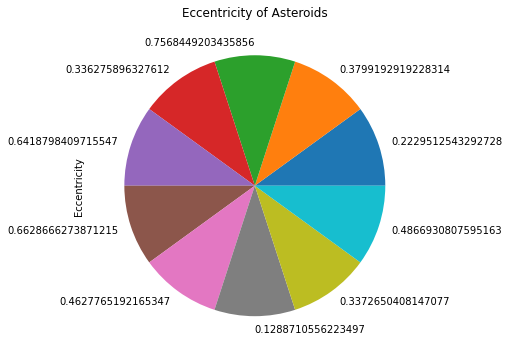

In [314]:
data1['Eccentricity'].value_counts().head(10).plot(kind='pie', title='Eccentricity of Asteroids', figsize=(6,6))

#### we can see the eccentricity is more in the range 0 to 0.2

Text(0.5, 0, 'Eccentricity')

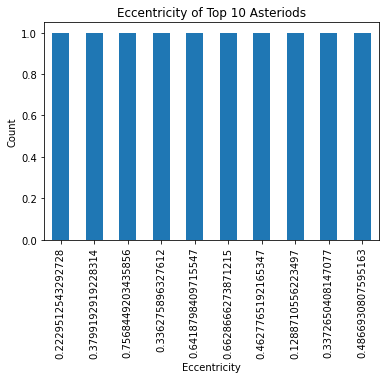

In [315]:
a = data1['Eccentricity'].value_counts().head(10).plot(kind='bar', title='Eccentricity of Top 10 Asteriods')
a.set_ylabel('Count')
a.set_xlabel('Eccentricity')

### *Feature : **Inclination***

<AxesSubplot:title={'center':'Inclination of Asteroids'}, ylabel='Density'>

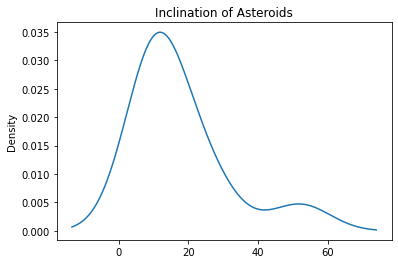

In [316]:
data1['Inclination'].head(10).plot(kind='kde', title='Inclination of Asteroids')

c:\Users\vardh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


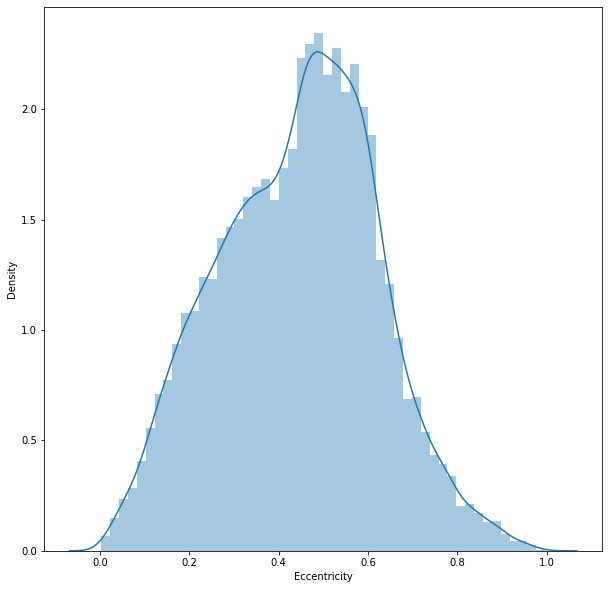

In [317]:
plt.figure(figsize = (10,10))
sns.distplot(data1['Eccentricity'])
plt.show()

#### *Here we can see the data is more concentrated in the range 0 to 10*

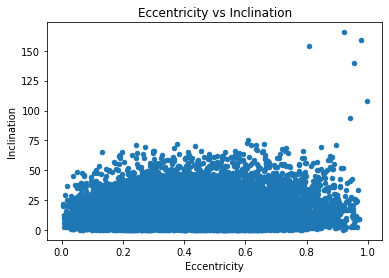

In [318]:
data1.plot(kind='scatter',x='Eccentricity', y='Inclination', title='Eccentricity vs Inclination')
plt.show()

c:\Users\vardh\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


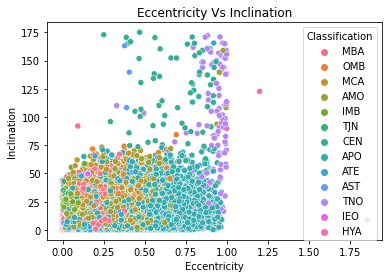

In [319]:
a = sns.scatterplot(x='Eccentricity',y='Inclination',hue='Classification',data=data)
a.set_title('Eccentricity Vs Inclination')
plt.show()

### *Feature :**Classification***

c:\Users\vardh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


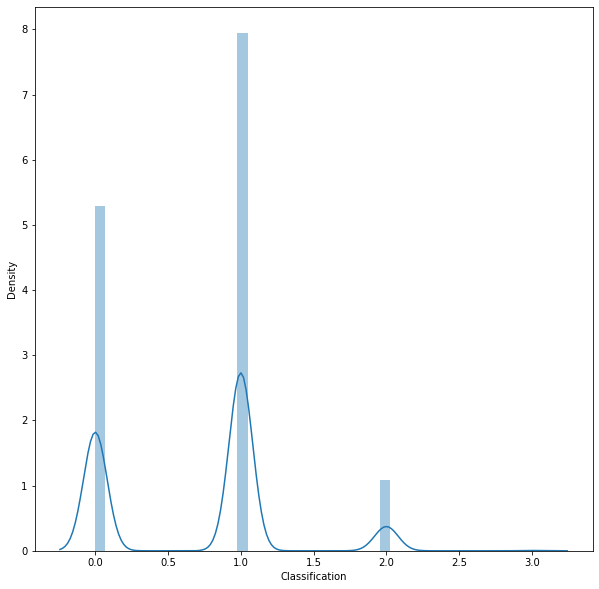

In [320]:
plt.figure(figsize = (10,10))
sns.distplot(data1['Classification'])
plt.show()

<AxesSubplot:title={'center':'Classification of Asteroids'}, ylabel='Classification'>

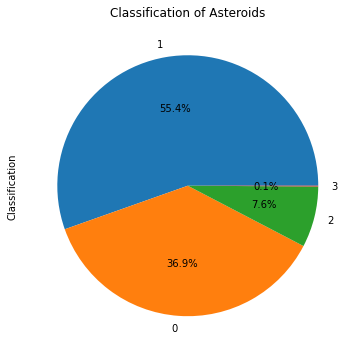

In [321]:
data1['Classification'].value_counts().plot(kind='pie', title='Classification of Asteroids', figsize=(6,6), autopct='%1.1f%%')

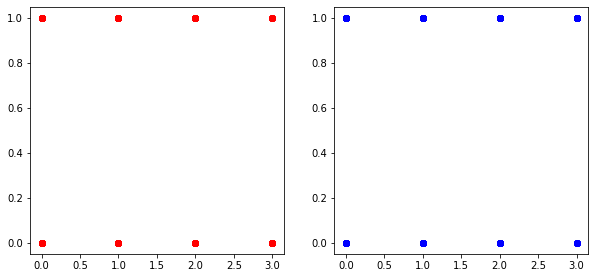

In [322]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)

plt.scatter(data1['Classification'],data1['pha']==1, color='red', label='pha=1')

plt.subplot(2,2,2)
plt.scatter(data1['Classification'],data1['pha']==0, color='blue', label='pha=0')

# plt.subplot(2,2,3)
# plt.scatter(data1['Classification'],data1['neo']==1, color='green', label='neo=1')

# plt.subplot(2,2,4)
# plt.scatter(data1['Classification'],data1['neo']==0, color='yellow', label='neo=0')

plt.show()

Text(0.5, 0, 'Classification')

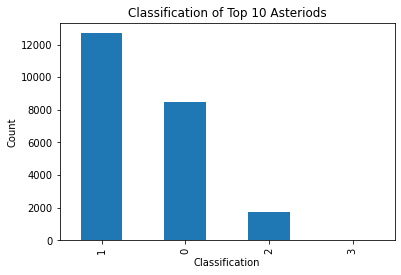

In [323]:
a = data1['Classification'].value_counts().head(10).plot(kind='bar', title='Classification of Top 10 Asteriods')
a.set_ylabel('Count')
a.set_xlabel('Classification')

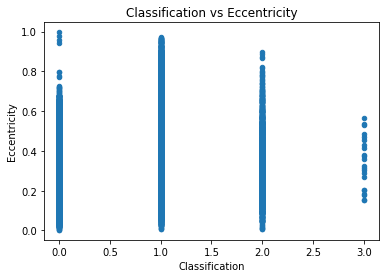

In [324]:
data1.plot(kind='scatter',x='Classification', y='Eccentricity', title='Classification vs Eccentricity')
plt.show()

### *Feature :**rms***

<AxesSubplot:title={'center':'rms of Asteroids'}, ylabel='Density'>

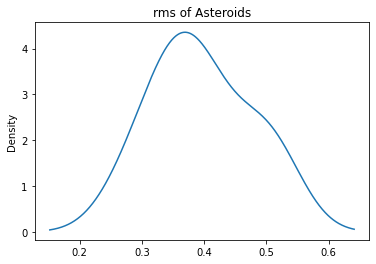

In [325]:
data1['rms'].head(10).plot(kind='kde', title='rms of Asteroids')

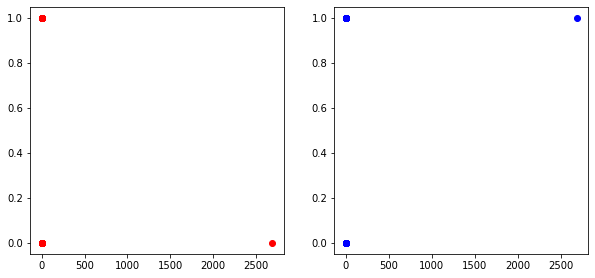

In [326]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)

plt.scatter(data1['rms'],data1['pha']==1, color='red', label='pha=1')

plt.subplot(2,2,2)
plt.scatter(data1['rms'],data1['pha']==0, color='blue', label='pha=0')


plt.show()

Text(0.5, 0, 'rms')

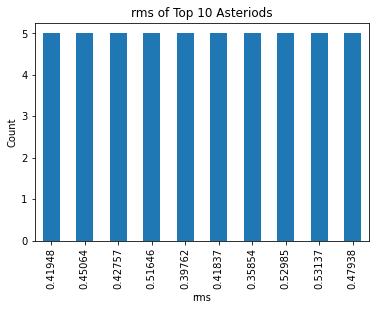

In [327]:
a = data1['rms'].value_counts().head(10).plot(kind='bar', title='rms of Top 10 Asteriods')
a.set_ylabel('Count')
a.set_xlabel('rms')

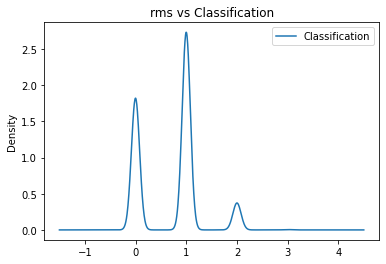

In [328]:
data1.plot(kind='kde',x='rms', y='Classification', title='rms vs Classification')
plt.show()

## Standardisation

*Standardization is one of the Feature scaling technique where the values are centered
around the mean with a unit standard deviation.
This is often called as Z-score Normalization .
Usually we have so many number of columns in our data set and each column values may
have different range of values depending on the column property. So inorder to reduce the
differnt ranges of values in every columns we use Standardization technique.
After Standadization is conducted the transformed data will have a mean of zero and a
standard devaition of 1.*

In [329]:
dtemp=data1.copy()
dtemp.drop(['pha'], axis=1, inplace=True)
f1_x=dtemp.values.astype(float)
scaler=preprocessing.StandardScaler()
scaled=scaler.fit_transform(f1_x)
rescaled1 = pd.DataFrame(scaled,columns=dtemp.columns)
rescaled1.head()

,H,orbit_id,Eccentricity,Inclination,om,w,ma,Mean_Motion,Time_of_Perihelion_Passage,Period_Years,moid_ld,sigma_e,sigma_q,sigma_i,sigma_om,sigma_ma,Classification,rms
0,-4.174108,-0.146254,-1.248717,-0.151766,1.273088,-0.029741,0.819824,0.146206,0.557856,-0.022546,0.541385,-0.045904,-0.042619,-0.039076,-0.039419,-0.05173,-1.17444,-0.018314
1,-2.500026,0.828688,0.579987,-0.085522,0.109321,-0.247645,-0.259507,-1.029128,0.030367,0.035012,1.078661,-0.045903,-0.042618,-0.039076,-0.039416,-0.05173,-1.17444,-0.011709
2,-3.035732,-0.720889,0.714330,-0.280912,-0.600277,1.617196,1.013804,-0.945868,0.626051,0.026001,-0.108980,-0.045903,-0.042618,-0.039075,-0.039414,-0.05173,-1.17444,-0.005485
3,-4.508925,-0.042949,0.503629,1.272750,0.415451,-0.476161,-1.377270,-1.041147,0.434285,0.036466,2.464223,-0.045903,-0.042618,-0.039075,-0.039418,-0.05173,-1.17444,-0.012213
4,-1.729948,1.803631,-0.048820,-0.057741,-0.011856,-1.490252,-1.099144,-0.527946,0.377561,-0.002062,0.138156,-0.045903,-0.042618,-0.039075,-0.039414,-0.05173,-1.17444,-0.007688


In [330]:
rescaled1.describe().round(0)

,H,orbit_id,Eccentricity,Inclination,om,w,ma,Mean_Motion,Time_of_Perihelion_Passage,Period_Years,moid_ld,sigma_e,sigma_q,sigma_i,sigma_om,sigma_ma,Classification,rms
count,22894.0,22894.0,22894.0,22894.0,22894.0,22894.0,22894.0,22894.0,22894.0,22894.0,22894.0,22894.0,22894.0,22894.0,22894.0,22894.0,22894.0,22894.0
mean,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-5.0,-1.0,-2.0,-1.0,-2.0,-2.0,-1.0,-2.0,-10.0,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-1.0,-0.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-1.0,-0.0
50%,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0
75%,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0
max,3.0,2.0,3.0,14.0,2.0,2.0,2.0,7.0,1.0,151.0,6.0,98.0,82.0,96.0,97.0,92.0,4.0,151.0


<AxesSubplot:ylabel='Frequency'>

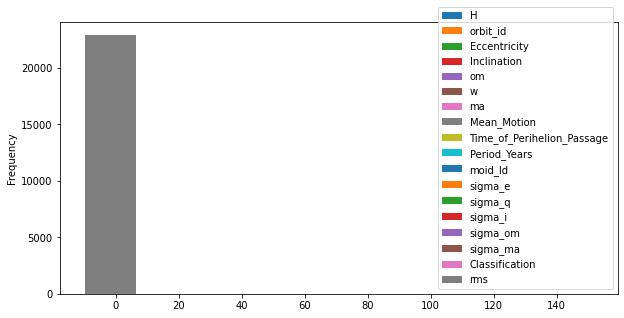

In [331]:
rescaled1.plot(kind='hist',figsize=(10,5))

*Standardisation is a process of transforming data into a common format which allows the researcher to make the meaningful comparison.*


#### *Here we can see the data is now centered around the mean with a unit standard deviation*


<AxesSubplot:>

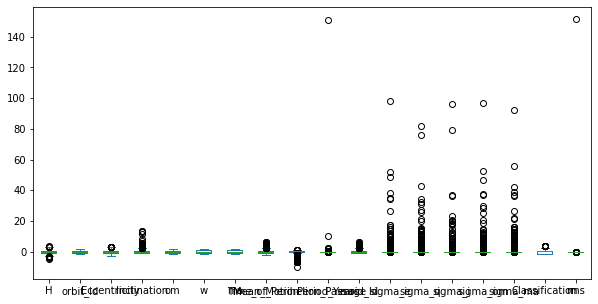

In [333]:
rescaled1.plot(kind='box',figsize=(10,5))

## *Normalisation*

In [334]:
temp=data1.copy()
temp.drop(['pha'], axis=1, inplace=True)
arr=temp.values.astype(float)
mms=preprocessing.MinMaxScaler()
x_scaled = mms.fit_transform(arr)
rescaled = pd.DataFrame(x_scaled,columns=temp.columns)
rescaled.head()

,H,orbit_id,Eccentricity,Inclination,om,w,ma,Mean_Motion,Time_of_Perihelion_Passage,Period_Years,moid_ld,sigma_e,sigma_q,sigma_i,sigma_om,sigma_ma,Classification,rms
0,0.042017,0.396154,0.221516,0.065349,0.845317,0.496909,0.752978,0.235063,0.924648,0.000203,0.210001,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.347899e-11,0.0,0.000088
1,0.252101,0.686538,0.547198,0.069801,0.510737,0.433832,0.389642,0.096519,0.876909,0.000585,0.287516,1.367395e-09,7.065659e-09,7.462290e-09,2.879125e-08,1.147542e-09,0.0,0.000132
2,0.184874,0.225000,0.571124,0.056669,0.306730,0.973647,0.818277,0.106334,0.930820,0.000525,0.116171,2.746634e-09,1.336920e-08,1.342682e-08,4.754059e-08,5.929397e-09,0.0,0.000173
3,0.000000,0.426923,0.533599,0.161086,0.598749,0.367684,0.013368,0.095103,0.913465,0.000594,0.487417,1.526327e-09,7.880744e-09,1.043429e-08,1.227764e-08,1.085073e-09,0.0,0.000129
4,0.348739,0.976923,0.435211,0.071668,0.475900,0.074136,0.106994,0.155597,0.908331,0.000339,0.151826,2.710579e-09,1.011887e-08,1.481167e-08,4.702842e-08,3.965101e-09,0.0,0.000158


In [335]:
rescaled.reset_index(drop=True, inplace=True)

In [336]:
temp.isnull().sum()

H                             0
orbit_id                      0
Eccentricity                  0
Inclination                   0
om                            0
w                             0
ma                            0
Mean_Motion                   0
Time_of_Perihelion_Passage    0
Period_Years                  0
moid_ld                       0
sigma_e                       0
sigma_q                       0
sigma_i                       0
sigma_om                      0
sigma_ma                      0
Classification                0
rms                           0
dtype: int64

In [337]:
rescaled.describe()

,H,orbit_id,Eccentricity,Inclination,om,w,ma,Mean_Motion,Time_of_Perihelion_Passage,Period_Years,moid_ld,sigma_e,sigma_q,sigma_i,sigma_om,sigma_ma,Classification,rms
count,22894.000000,22894.000000,22894.000000,22894.000000,22894.000000,22894.000000,22894.000000,22894.000000,22894.000000,22894.000000,22894.000000,2.289400e+04,2.289400e+04,2.289400e+04,2.289400e+04,2.289400e+04,22894.000000,22894.000000
mean,0.565834,0.439715,0.443906,0.075549,0.479308,0.505518,0.477000,0.217829,0.874160,0.000353,0.131894,4.673467e-04,5.222201e-04,4.065020e-04,4.061779e-04,5.593550e-04,0.236030,0.000209
std,0.125495,0.297855,0.178098,0.067208,0.287503,0.289476,0.336638,0.117879,0.090505,0.006627,0.144277,1.018127e-02,1.225349e-02,1.040300e-02,1.030434e-02,1.081315e-02,0.200977,0.006608
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.470588,0.200000,0.312852,0.027591,0.228850,0.256865,0.145566,0.127297,0.880796,0.000164,0.022103,3.077170e-08,6.590703e-08,9.420388e-08,9.496702e-08,9.190690e-08,0.000000,0.000134
50%,0.575630,0.382692,0.457543,0.053335,0.479039,0.511336,0.453883,0.184495,0.906583,0.000276,0.074711,8.973914e-06,2.760682e-06,4.577496e-06,8.996596e-07,2.554637e-05,0.333333,0.000162
75%,0.662752,0.661538,0.570228,0.107094,0.704770,0.754436,0.806288,0.275944,0.920176,0.000428,0.201539,5.672001e-05,2.220842e-05,3.701009e-05,6.772165e-06,1.339295e-04,0.333333,0.000193
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000


<AxesSubplot:ylabel='Frequency'>

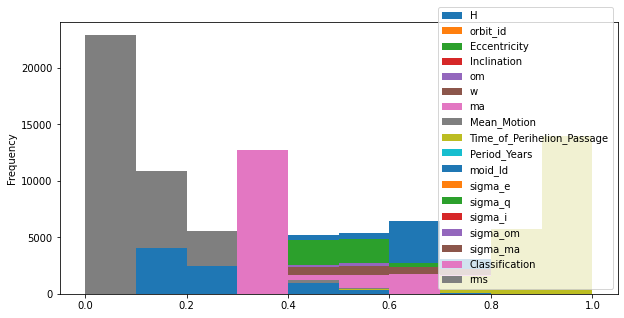

In [338]:
rescaled.plot(kind='hist',figsize=(10,5))

In [339]:
rescaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22894 entries, 0 to 22893
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   H                           22894 non-null  float64
 1   orbit_id                    22894 non-null  float64
 2   Eccentricity                22894 non-null  float64
 3   Inclination                 22894 non-null  float64
 4   om                          22894 non-null  float64
 5   w                           22894 non-null  float64
 6   ma                          22894 non-null  float64
 7   Mean_Motion                 22894 non-null  float64
 8   Time_of_Perihelion_Passage  22894 non-null  float64
 9   Period_Years                22894 non-null  float64
 10  moid_ld                     22894 non-null  float64
 11  sigma_e                     22894 non-null  float64
 12  sigma_q                     22894 non-null  float64
 13  sigma_i                     228

In [340]:
rescaled.isnull().sum()

H                             0
orbit_id                      0
Eccentricity                  0
Inclination                   0
om                            0
w                             0
ma                            0
Mean_Motion                   0
Time_of_Perihelion_Passage    0
Period_Years                  0
moid_ld                       0
sigma_e                       0
sigma_q                       0
sigma_i                       0
sigma_om                      0
sigma_ma                      0
Classification                0
rms                           0
dtype: int64

## *Machine Learning Models*

### *Logistic Regression*

In [341]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X =rescaled1
Y= data1['pha']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [342]:
X_train.shape

(18315, 18)

In [343]:
X_test.shape

(4579, 18)

In [344]:
lr=LogisticRegression()

lr.fit(X_train,Y_train)

print("Accuracy of Logistic Regression on training set: {:.2f}".format(lr.score(X_train, Y_train)))


Accuracy of Logistic Regression on training set: 0.96


In [345]:
a=lr.score(X_test,Y_test)
print("Accuracy of Logistic Regression on training set is: {:.2f}".format(lr.score(X_train, Y_train)))
print("Accuracy of Logistic Regression on test set is: {:.2f}".format(a))


Accuracy of Logistic Regression on training set is: 0.96
Accuracy of Logistic Regression on test set is: 0.96


In [346]:
from sklearn.metrics import confusion_matrix

y_pred = lr.predict(X_test)

confusion_matrix(Y_test, y_pred)

array([[4124,   66],
       [  96,  293]], dtype=int64)

In [347]:
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

tn, fp, fn, tp

(4124, 66, 96, 293)

Text(0.5, 1.0, 'Confusion Matrix')

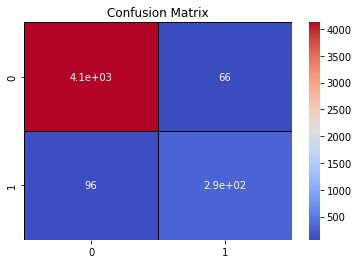

In [348]:
import seaborn as sns
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, cmap='coolwarm', linewidths=1, linecolor='black').set_title('Confusion Matrix')

In [349]:
X_test.shape

(4579, 18)

In [350]:
Y_test.shape

(4579,)

In [351]:
(Y_test).value_counts()

0    4190
1     389
Name: pha, dtype: int64

In [352]:
list1=[]
list1=y_pred

counter1=0
counter2=0
for i in range(len(list1)):
    if list1[i]==1:
        counter1+=1
    else:
        counter2+=1

print("Number of 0's in the list: ", counter2)
print("Number of 1's in the list: ", counter1)



Number of 0's in the list:  4220
Number of 1's in the list:  359


In [353]:

from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4190
           1       0.82      0.75      0.78       389

    accuracy                           0.96      4579
   macro avg       0.90      0.87      0.88      4579
weighted avg       0.96      0.96      0.96      4579



In [354]:
from sklearn import metrics
def model_stats(y_test, y_pred):
  print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
  print("Precision: ", metrics.precision_score(y_test, y_pred))
  print("Recall: ", metrics.recall_score(y_test, y_pred))
  print("F1 Score: ", metrics.f1_score(y_test, y_pred))
  
model_stats(Y_test, y_pred)

Accuracy:  0.9646210963092379
Precision:  0.8161559888579387
Recall:  0.7532133676092545
F1 Score:  0.7834224598930482


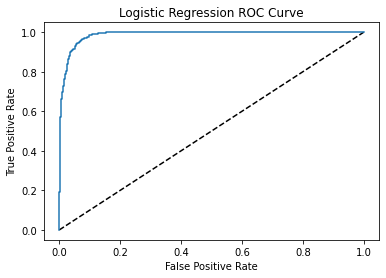

In [358]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = lr.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC Curve')

plt.show()

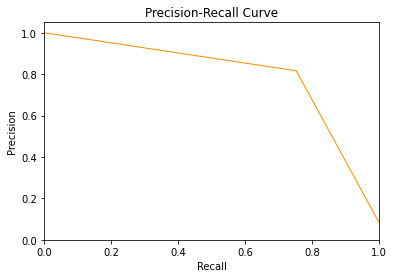

In [360]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(Y_test, y_pred)

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


#### *Decison Tree*

In [361]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

tr = DecisionTreeClassifier()

tr.fit(X_train,Y_train)

print("Test accuracy for the train set is ")
tr.score(X_train,Y_train)



Test accuracy for the train set is 


1.0

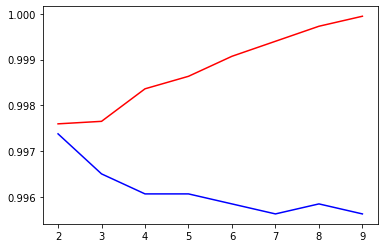

In [362]:
xx=[]
yy=[]
yyy=[]

for i in range(2, 10):
    ra = DecisionTreeClassifier(max_depth=i)

    ra.fit(X_train,Y_train)
    predd=ra.predict(X_test)
    pred=ra.predict(X_train)
    xx.append(i)
    yy.append(accuracy_score(Y_test,predd))
    yyy.append(accuracy_score(Y_train,pred))
    # print("Test accuracy for the train set is ")
    # ra.score(X_train,Y_train)
plt.plot(xx,yy,'b',label='test')
plt.plot(xx,yyy,'r',label='train')


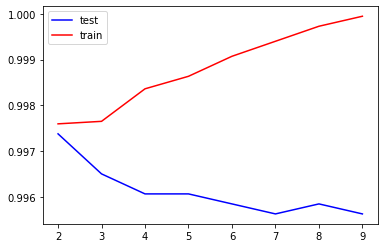

In [363]:
plt.plot(xx,yy,'b',label='test')
plt.plot(xx,yyy,'r',label='train')
plt.legend()
plt.show()

In [364]:
text_representation = tree.export_text(tr)
print(text_representation)

|--- feature_0 <= -0.28
|   |--- feature_10 <= -0.42
|   |   |--- feature_0 <= -0.29
|   |   |   |--- feature_3 <= -1.12
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  -1.12
|   |   |   |   |--- feature_0 <= -0.32
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  -0.32
|   |   |   |   |   |--- feature_7 <= 2.32
|   |   |   |   |   |   |--- feature_8 <= 0.57
|   |   |   |   |   |   |   |--- feature_6 <= -1.37
|   |   |   |   |   |   |   |   |--- feature_12 <= -0.04
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_12 >  -0.04
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_6 >  -1.37
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_8 >  0.57
|   |   |   |   |   |   |   |--- feature_12 <= -0.04
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_12 >  -0.04
|   |   |   |   |   |   |   |   |--- class: 0


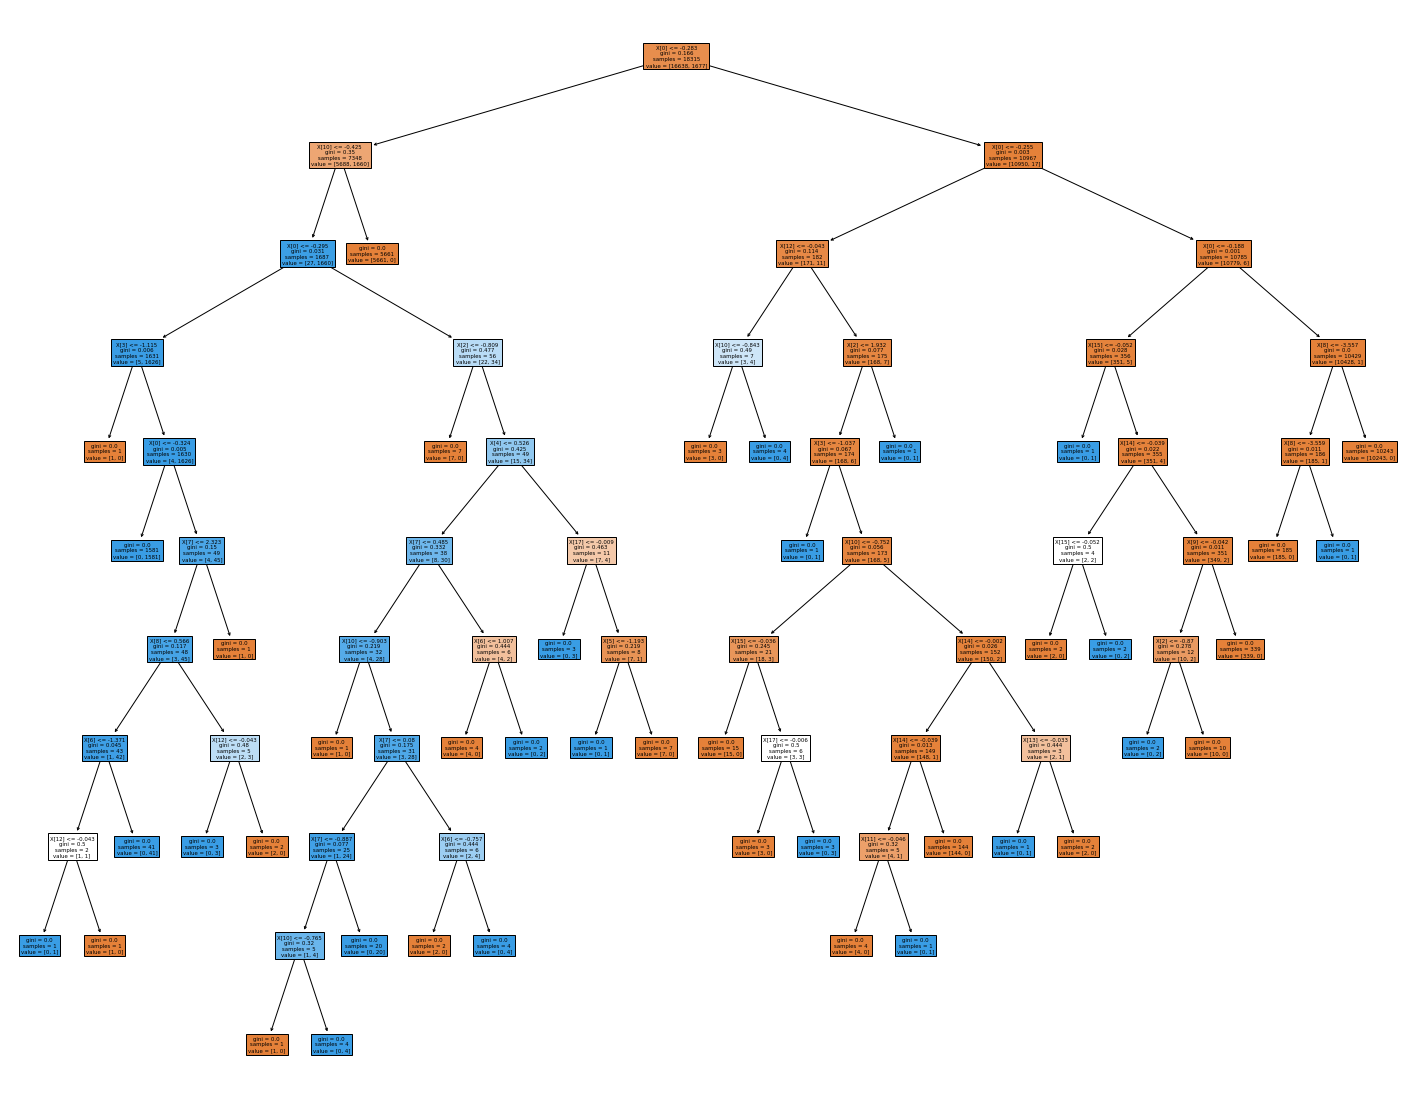

In [365]:
fig=plt.figure(figsize=(25,20))

_=tree.plot_tree(tr, filled=True)
fig.savefig("decistion_tree.png")

In [366]:
b=tr.score(X_test,Y_test)

In [367]:
tree_pred = tr.predict(X_test)

confusion_matrix(Y_test, tree_pred)


array([[4178,   12],
       [   6,  383]], dtype=int64)

In [368]:
tn, fp, fn, tp = confusion_matrix(Y_test, tree_pred).ravel()

tn, fp, fn, tp

(4178, 12, 6, 383)

Text(0.5, 1.0, 'Confusion Matrix')

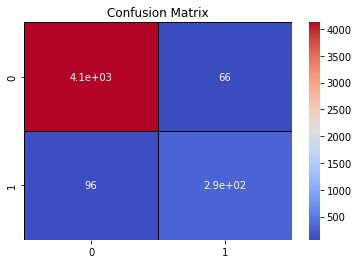

In [369]:
import seaborn as sns
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, cmap='coolwarm', linewidths=1, linecolor='black').set_title('Confusion Matrix')

In [370]:
tree_pred_prob = tr.predict_proba(X_test)[:,1]
tree_fpr, tree_tpr, tree_thresholds = roc_curve(Y_test, tree_pred_prob)

tree_auc = roc_auc_score(Y_test, tree_pred_prob)


Text(0.5, 1.0, 'Logistic Regression ROC Curve')

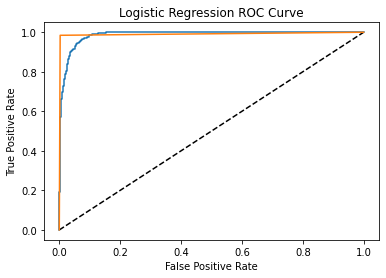

In [371]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.plot(tree_fpr,tree_tpr,label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')

### *Random Forest*

In [372]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
ra=RandomForestClassifier(n_estimators=100)

ra.fit(X_train,Y_train)

print("Accuracy for the training set  is ",end=" ")
print(ra.score(X_train,Y_train))
print("Accuracy for the test set is ",end=" ")
print(ra.score(X_test,Y_test))


Accuracy for the training set  is  1.0
Accuracy for the test set is  0.9969425638785762


In [373]:
xx=[]
yy=[]
yyy=[]

for i in range(2, 10):
    ra=RandomForestClassifier(n_estimators=i)
    ra.fit(X_train,Y_train)
    predd=ra.predict(X_test)
    pred=ra.predict(X_train)
    xx.append(i)
    yy.append(accuracy_score(Y_test,predd))
    yyy.append(accuracy_score(Y_train,pred))

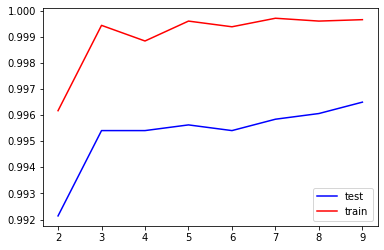

In [374]:
plt.plot(xx,yy,'b',label='test')
plt.plot(xx,yyy,'r',label='train')
plt.legend()
plt.show()

In [375]:
c=ra.score(X_test,Y_test)
print("Test accuracy for the test set is ",c)

Test accuracy for the test set is  0.9965057872898012


In [376]:
ra_pred = ra.predict(X_test)
print(confusion_matrix(Y_test, ra_pred))

[[4180   10]
 [   6  383]]


In [377]:
tn, fp, fn, tp = confusion_matrix(Y_test, ra_pred).ravel()

tn, fp, fn, tp

(4180, 10, 6, 383)

Text(0.5, 1.0, 'Confusion Matrix')

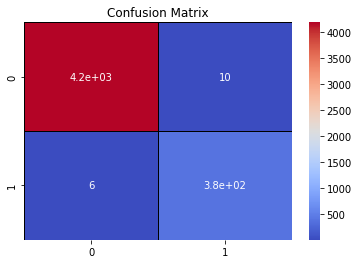

In [378]:
import seaborn as sns
sns.heatmap(confusion_matrix(Y_test, ra_pred), annot=True, cmap='coolwarm', linewidths=1, linecolor='black').set_title('Confusion Matrix')

In [379]:
from sklearn import metrics
def model_stats(y_test, y_pred):
  print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
  print("Precision: ", metrics.precision_score(y_test, y_pred))
  print("Recall: ", metrics.recall_score(y_test, y_pred))
  print("F1 Score: ", metrics.f1_score(y_test, y_pred))
  
model_stats(Y_test, ra_pred)

Accuracy:  0.9965057872898012
Precision:  0.9745547073791349
Recall:  0.9845758354755784
F1 Score:  0.979539641943734


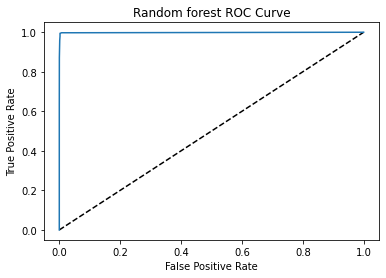

In [380]:
ra_pred_prob = ra.predict_proba(X_test)[:,1]
ra_fpr, ra_tpr, ra_thresholds = roc_curve(Y_test, ra_pred_prob)

ra_auc = roc_auc_score(Y_test, ra_pred_prob)

plt.plot([0,1],[0,1],'k--')

plt.plot(ra_fpr,ra_tpr,label='Random Forest')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random forest ROC Curve')
plt.show()

####  *Comparing all Machine learnnig model and accuracy*

In [381]:
new=pd.DataFrame({'Model':['Logistic Regression','Decision Treess','Random Forest'],'Accuracy':[a,b,c]})

new.head()

,Model,Accuracy
0,Logistic Regression,0.964621
1,Decision Treess,0.996069
2,Random Forest,0.996506


#### *We can see that Random forest has given us best acuuracy out of all these three machine learning models*